In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calplot

from statsmodels.tsa.seasonal import seasonal_decompose
from itertools import product
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier, 
    GradientBoostingClassifier
)

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

from itertools import product
import joblib
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import mannwhitneyu


In [3]:
from dotenv import dotenv_values
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

# Load environment variables from .env file
import pyodbc
database = "DATABASE"
server = "SERVER"
username = 'USERNAME'
password = "PASSWORD"



# Connection string
connection_string = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Connect to the database
connection = pyodbc.connect(connection_string)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Example SQL query
sql_query = "SELECT * FROM your_table"

# Execute the SQL query
cursor.execute(sql_query)

# Fetch the results
rows = cursor.fetchall()

# Print the results
for row in rows:
    print(row)

# Close the connection
connection.close()


OperationalError: ('08001', '[08001] [Microsoft][ODBC Driver 18 for SQL Server]Named Pipes Provider: Could not open a connection to SQL Server [53].  (53) (SQLDriverConnect); [08001] [Microsoft][ODBC Driver 18 for SQL Server]Login timeout expired (0); [08001] [Microsoft][ODBC Driver 18 for SQL Server]A network-related or instance-specific error has occurred while establishing a connection to SERVER. Server is not found or not accessible. Check if instance name is correct and if SQL Server is configured to allow remote connections. For more information see SQL Server Books Online. (53)')

Hypothesis Tests 

Hypothesis

Formulate 1 null and alternate hypothesis each.

Null hypothesis : Products on promotions have higher or equal average sales compared those that are not on promotion
Alternative hypothesis: Products on promotions have lesser averages sales compared those that are not on promotion

product_promotion = train_filled_df[train_filled_df['Onpromotion]> 0]['sales'].mean()
product_without = train_filled_df[train_filled_df['Onpromotion]== 0]['sales'].mean()


In [2]:

holiday_df = pd.read_csv('holidays_events.csv')
train_df = pd.read_csv('train.csv')
oil_df = pd.read_csv('oil.csv')
transactions_df = pd.read_csv('transactions.csv')
store_df = pd.read_csv('stores.csv')



In [3]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
train_date_range = pd.date_range(start=train_df['date'].min(), end=train_df['date'].max(), freq='D')


In [5]:
families = train_df['family'].unique()
stores = train_df['store_nbr'].unique()

# Create a DataFrame with all possible combinations of dates and families
all_combinations = pd.MultiIndex.from_product([train_date_range, families, stores], names=['date', 'family', 'store_nbr'])
all_df = pd.DataFrame(index=all_combinations).reset_index()


In [6]:
train_df['date'] = pd.to_datetime(train_df['date'])

In [7]:
train_df['Year'] = train_df['date'].dt.year
train_df['Month'] = train_df['date'].dt.month
train_df['Day'] = train_df['date'].dt.day
train_df['Month_name'] = train_df['date'].dt.strftime('%B')
train_df['Day_name'] = train_df['date'].dt.strftime('%A')

In [8]:

# Merge with the original DataFrame to fill missing values
train_filled_df = pd.merge(all_df, train_df, how='left', on=['date', 'family', 'store_nbr'])

# Fill remaining missing values with zeros
train_filled_df['sales'] = train_filled_df['sales'].fillna(0)
train_filled_df['onpromotion'] = train_filled_df['onpromotion'].fillna(0)

# Print the DataFrame with missing dates filled
print(train_filled_df)

              date      family  store_nbr         id   sales  onpromotion  \
0       2013-01-01  AUTOMOTIVE          1        0.0   0.000          0.0   
1       2013-01-01  AUTOMOTIVE         10       33.0   0.000          0.0   
2       2013-01-01  AUTOMOTIVE         11       66.0   0.000          0.0   
3       2013-01-01  AUTOMOTIVE         12       99.0   0.000          0.0   
4       2013-01-01  AUTOMOTIVE         13      132.0   0.000          0.0   
...            ...         ...        ...        ...     ...          ...   
3008011 2017-08-15     SEAFOOD         54  3000755.0   3.000          0.0   
3008012 2017-08-15     SEAFOOD          6  3000788.0  47.575          0.0   
3008013 2017-08-15     SEAFOOD          7  3000821.0  46.507          0.0   
3008014 2017-08-15     SEAFOOD          8  3000854.0  23.330          0.0   
3008015 2017-08-15     SEAFOOD          9  3000887.0  16.000          0.0   

           Year  Month   Day Month_name Day_name  
0        2013.0    1.0  

Univariate Analysis

In [9]:
num_column_train= train_filled_df.select_dtypes(include='number')

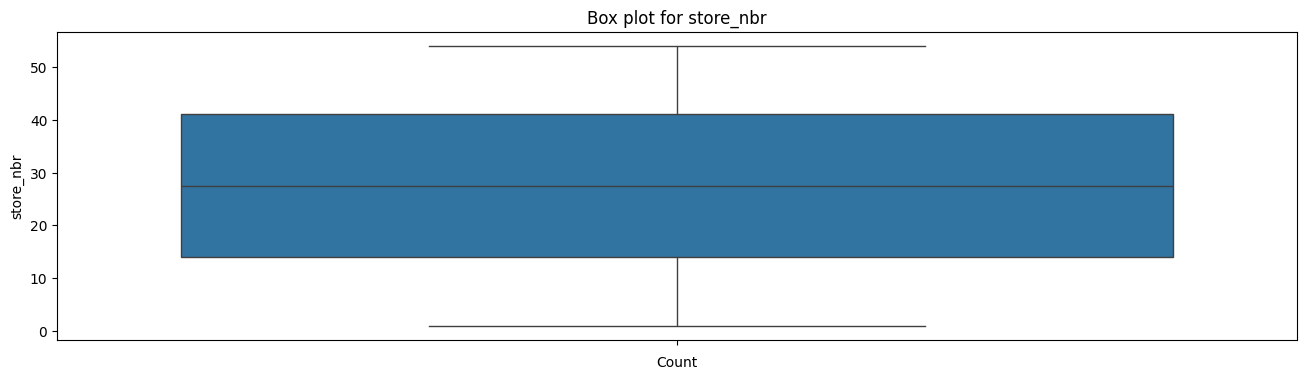

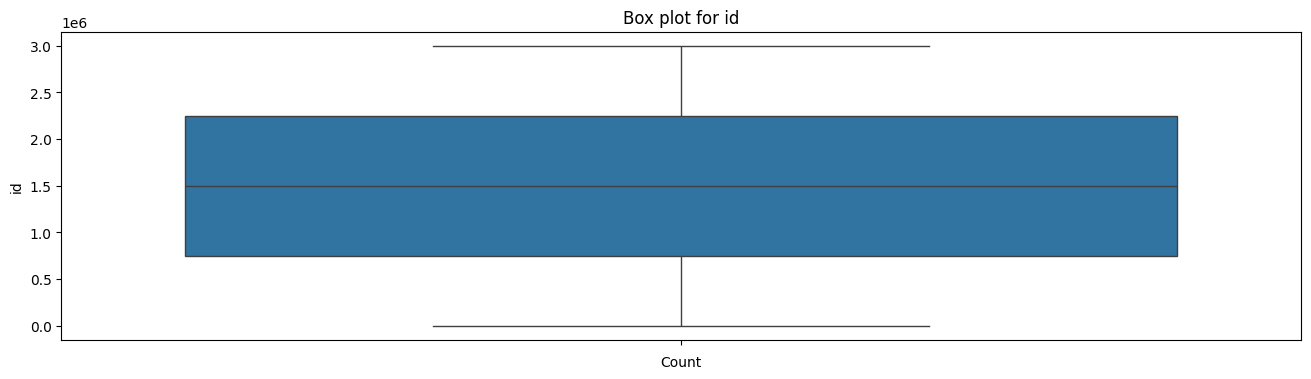

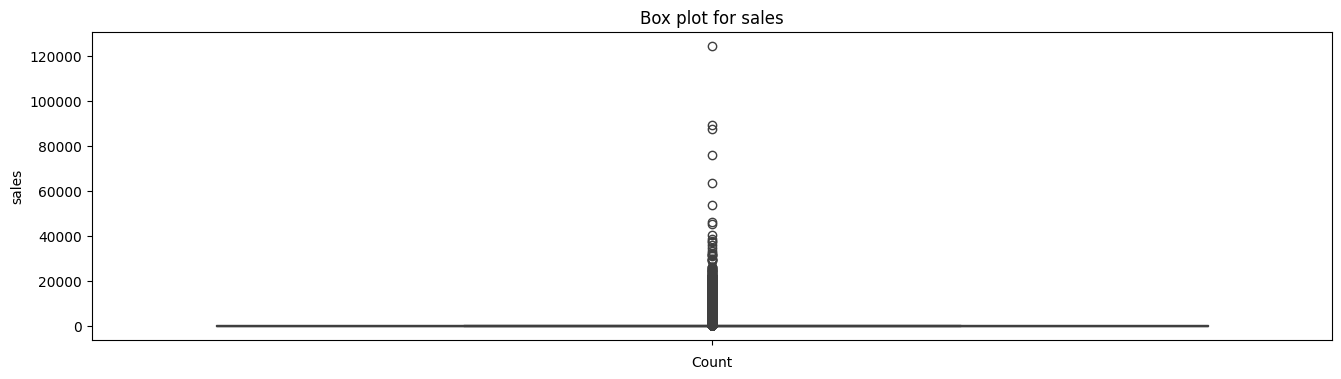

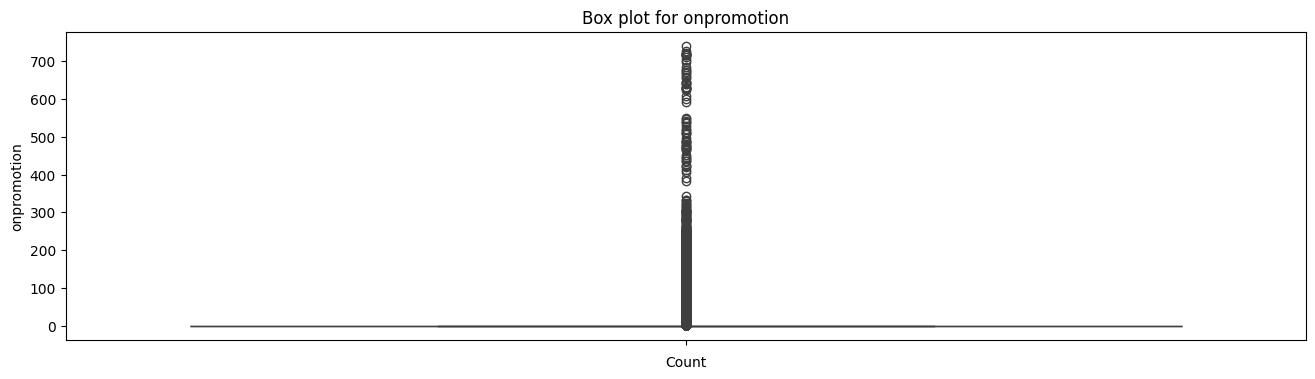

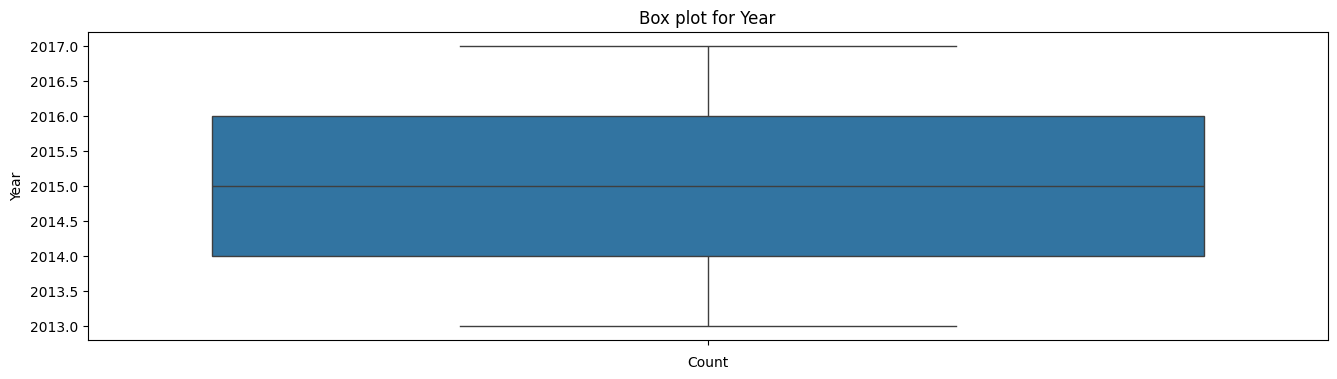

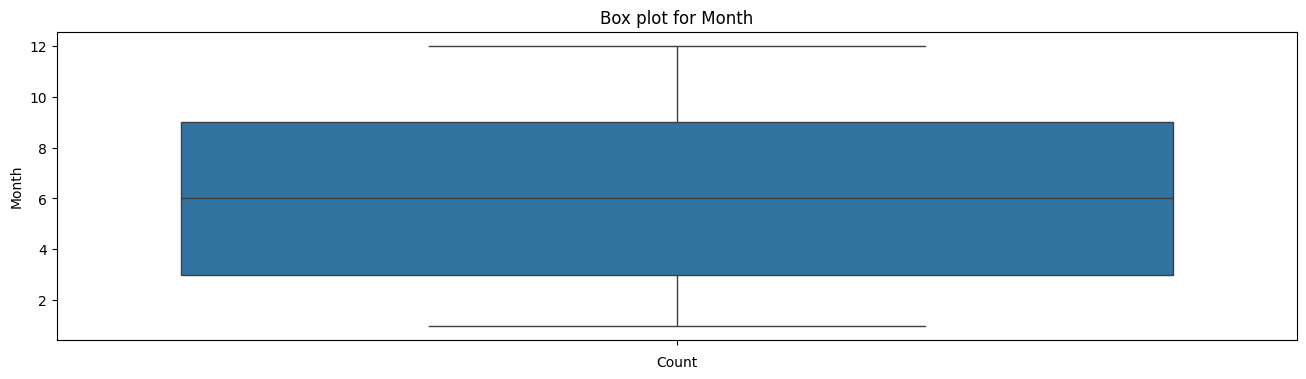

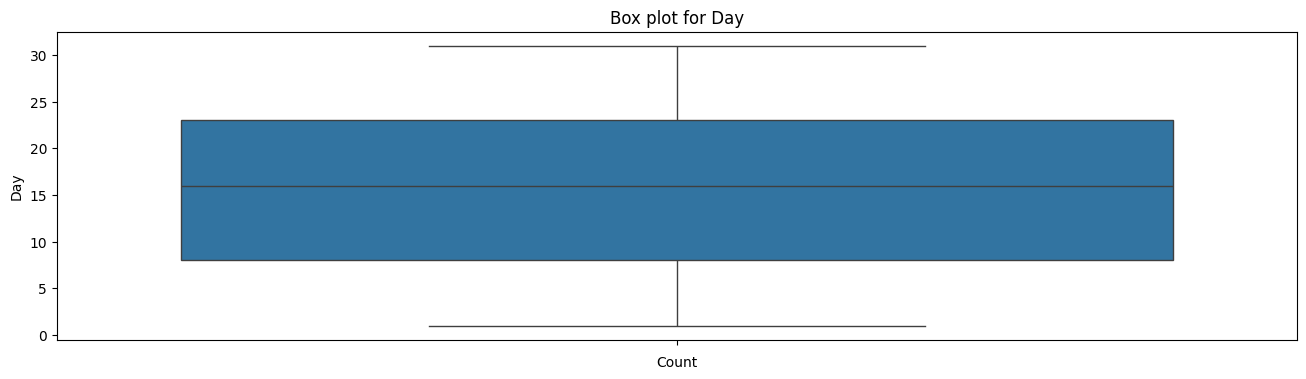

In [9]:
for column in num_column_train:
    plt.figure(figsize=(16, 4))  # Set figure size
    # Create a horizontal bar plot for the current column
    sns.boxplot(y=column, data=train_df)
    plt.title(f'Box plot for {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

In [10]:
train_filled_df.dtypes

date           datetime64[ns]
family                 object
store_nbr               int64
id                    float64
sales                 float64
onpromotion           float64
Year                  float64
Month                 float64
Day                   float64
Month_name             object
Day_name               object
dtype: object

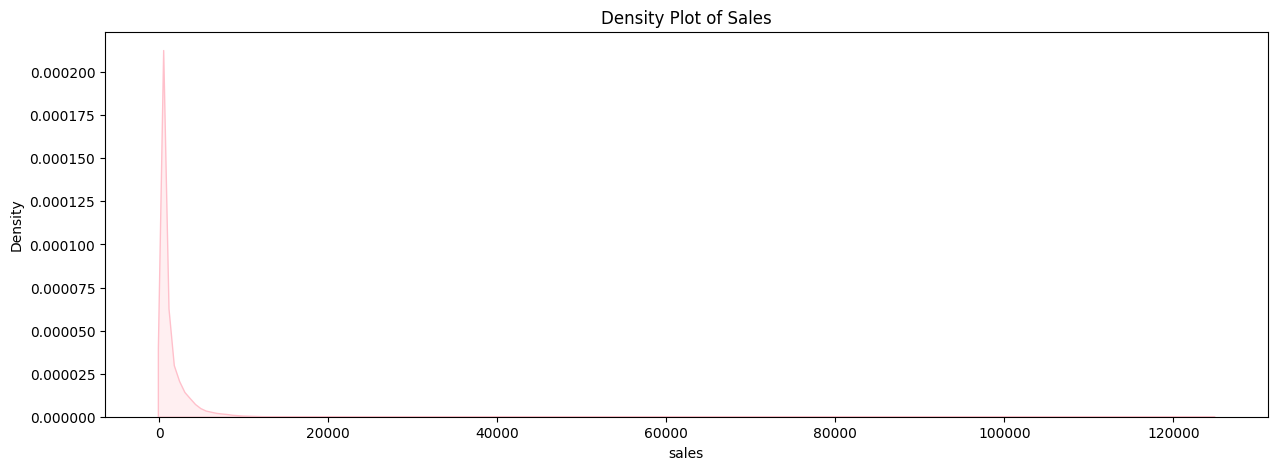

In [11]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=train_filled_df['sales'], fill=True, color='pink')
plt.title('Density Plot of Sales')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20820\2107312365.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train_filled_df['onpromotion'], shade=True, color='pink')


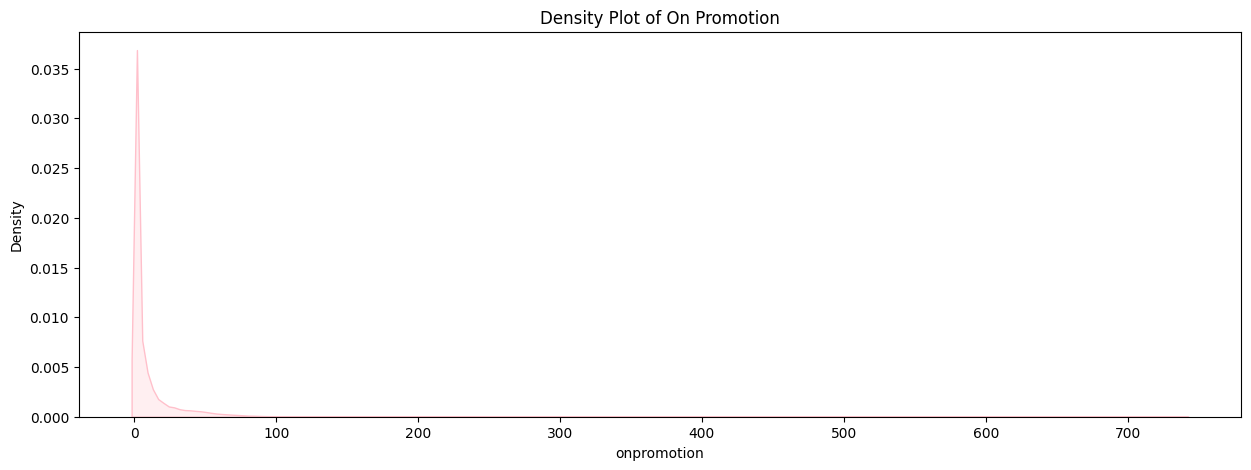

In [12]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=train_filled_df['onpromotion'], shade=True, color='pink')
plt.title('Density Plot of On Promotion')
plt.show()

In [13]:
train_filled_df.groupby(train_filled_df['date'].dt.year)['sales'].sum()

date
2013    1.404190e+08
2014    2.094742e+08
2015    2.408801e+08
2016    2.886545e+08
2017    1.942171e+08
Name: sales, dtype: float64

In [41]:
# Assuming 'date' column is already in datetime format
import pandas as pd

# Group by month and year, summing the sales
monthly_sales = train_filled_df.groupby([train_filled_df['date'].dt.year, train_filled_df['date'].dt.month])['sales'].sum()
monthly_sales

date  date
2013  1       1.032762e+07
      2       9.658960e+06
      3       1.142850e+07
      4       1.099346e+07
      5       1.159770e+07
      6       1.168934e+07
      7       1.125740e+07
      8       1.173779e+07
      9       1.179293e+07
      10      1.177562e+07
      11      1.235656e+07
      12      1.580312e+07
2014  1       1.891164e+07
      2       1.203835e+07
      3       2.036558e+07
      4       1.286125e+07
      5       1.337979e+07
      6       1.331996e+07
      7       1.942189e+07
      8       1.388518e+07
      9       2.002242e+07
      10      2.039610e+07
      11      2.053164e+07
      12      2.434045e+07
2015  1       1.489692e+07
      2       1.374240e+07
      3       1.559861e+07
      4       1.495507e+07
      5       1.773037e+07
      6       2.161536e+07
      7       2.220962e+07
      8       2.296367e+07
      9       2.324088e+07
      10      2.387827e+07
      11      2.280495e+07
      12      2.724398e+07
2016  1       2.3

In [42]:

# Find the month and year with the highest sales
max_month_year = monthly_sales.idxmax()
max_sales = monthly_sales[max_month_year]

print("Month with the highest sales:", max_month_year)
print("Sales:", max_sales)


Month with the highest sales: (2016, 12)
Sales: 29640287.5793851


In [12]:
train_filled_df.set_index('date', inplace=True)

BIVARIATE ANALYSIS 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


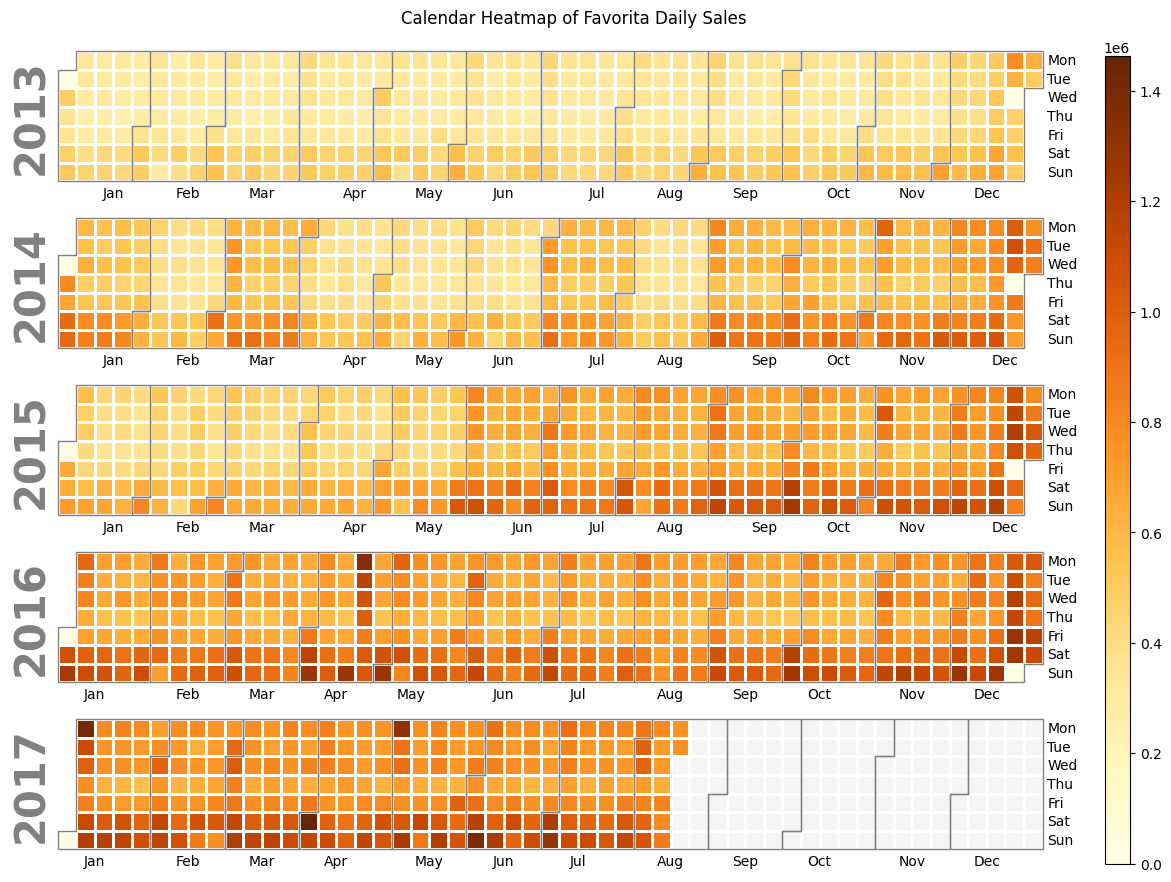

In [13]:
data = train_filled_df['sales']

# Resample the data to daily frequency if necessary
daily_data = data.resample('D').sum()

# Plot the calendar heatmap
calplot.calplot(daily_data, suptitle='Calendar Heatmap of Favorita Daily Sales', cmap='YlOrBr')
plt.show()


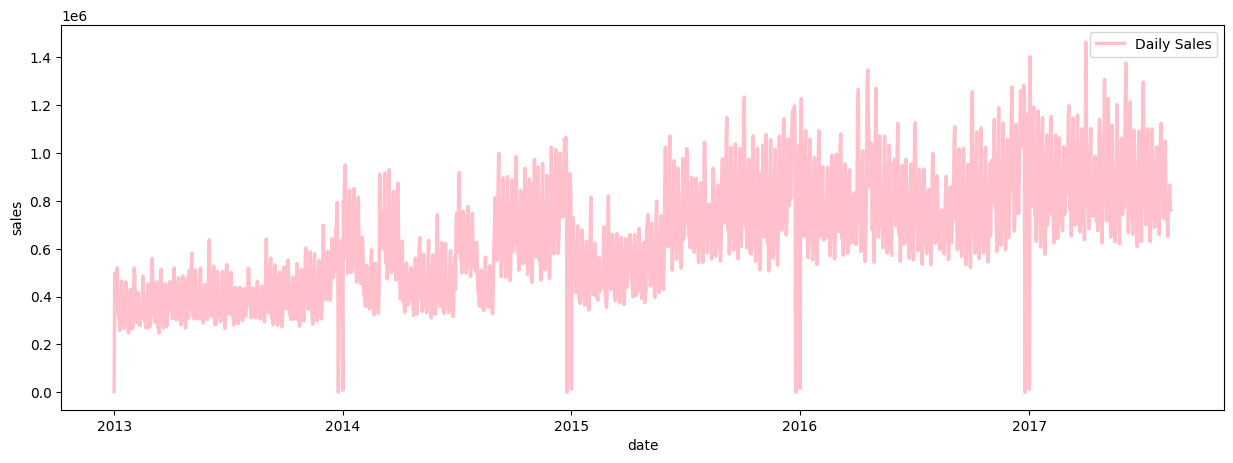

In [14]:
daily_sales=train_filled_df['sales'].sort_index(ascending=True).resample('D').sum()

plt.figure(figsize=(15,5))
sns.lineplot(data=daily_sales, color='pink', linewidth=2.5, label='Daily Sales')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4952\1854826275.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Montly_sales=train_filled_df['sales'].sort_index(ascending=True).resample('M').sum()


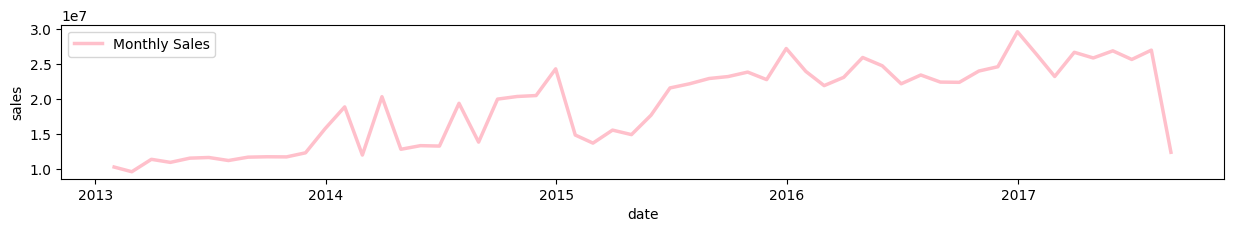

In [15]:
Montly_sales=train_filled_df['sales'].sort_index(ascending=True).resample('M').sum()

plt.figure(figsize=(15,2))
sns.lineplot(data=Montly_sales, color='pink', linewidth=2.5, label='Monthly Sales')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4952\270335284.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales=train_filled_df['sales'].sort_index(ascending=True).resample('Y').sum()


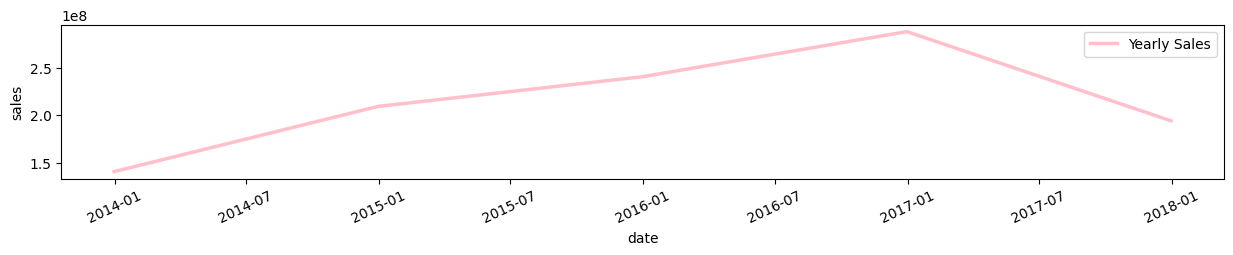

In [16]:
yearly_sales=train_filled_df['sales'].sort_index(ascending=True).resample('Y').sum()

plt.figure(figsize=(15,2))
sns.lineplot(data=yearly_sales, color='pink', linewidth=2.5, label='Yearly Sales')
plt.xticks(rotation=25)
plt.show()

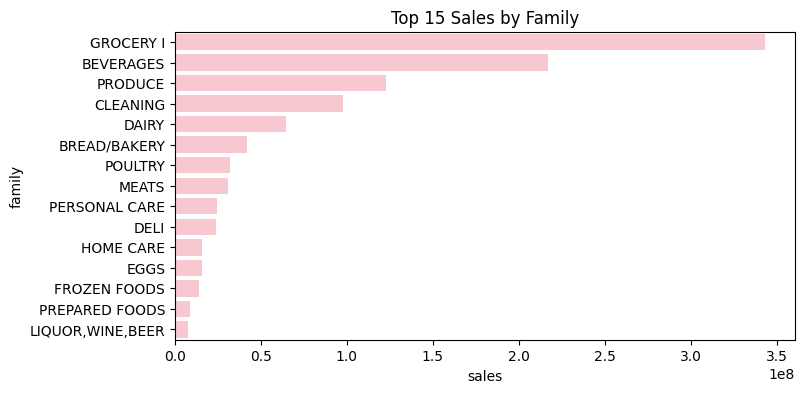

In [17]:
top_family = train_filled_df.groupby('family').sum().sort_values('sales', ascending=False).head(15).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=top_family, x='sales', y='family', color='pink', orient='h')
plt.title('Top 15 Sales by Family')
plt.show()

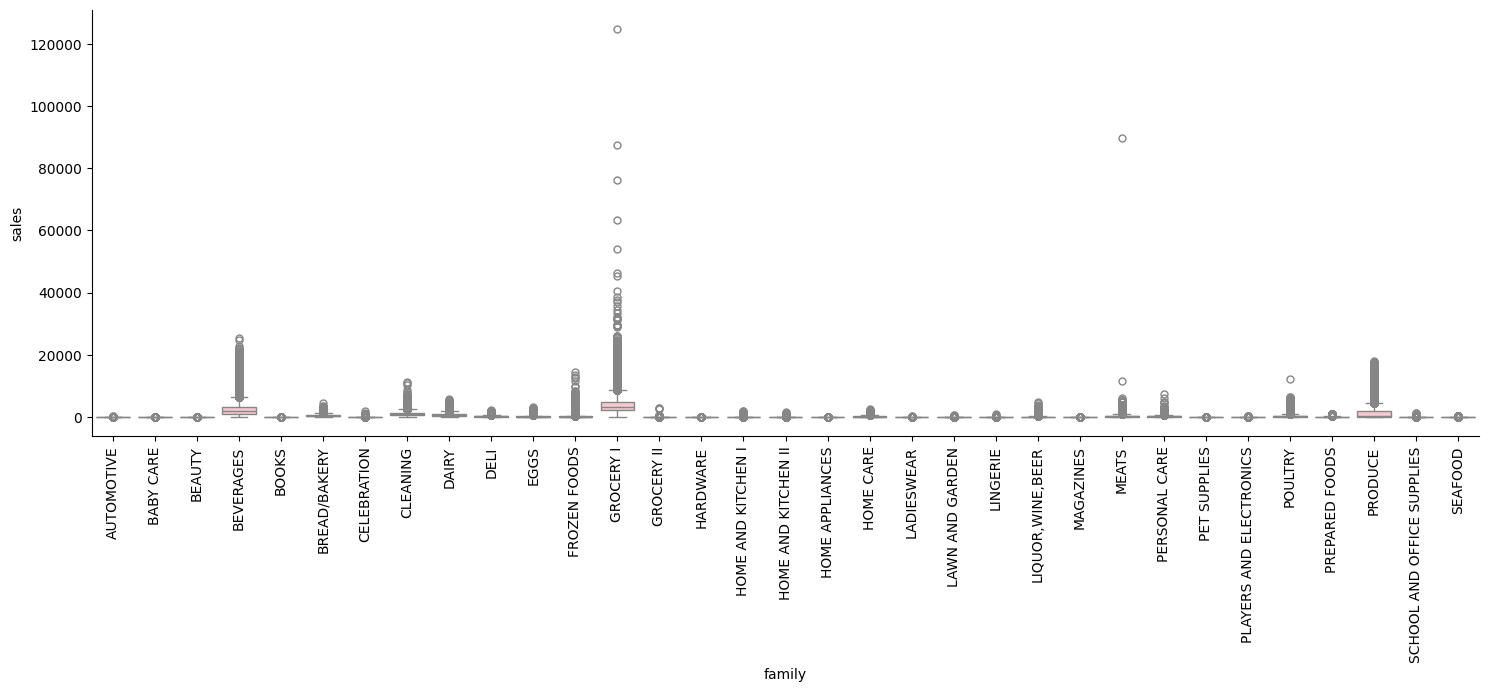

In [18]:
sns.catplot(data=train_filled_df, x='family', y='sales', kind='box', height=5, aspect=3, color='pink')
plt.xticks(rotation=90)
plt.show()

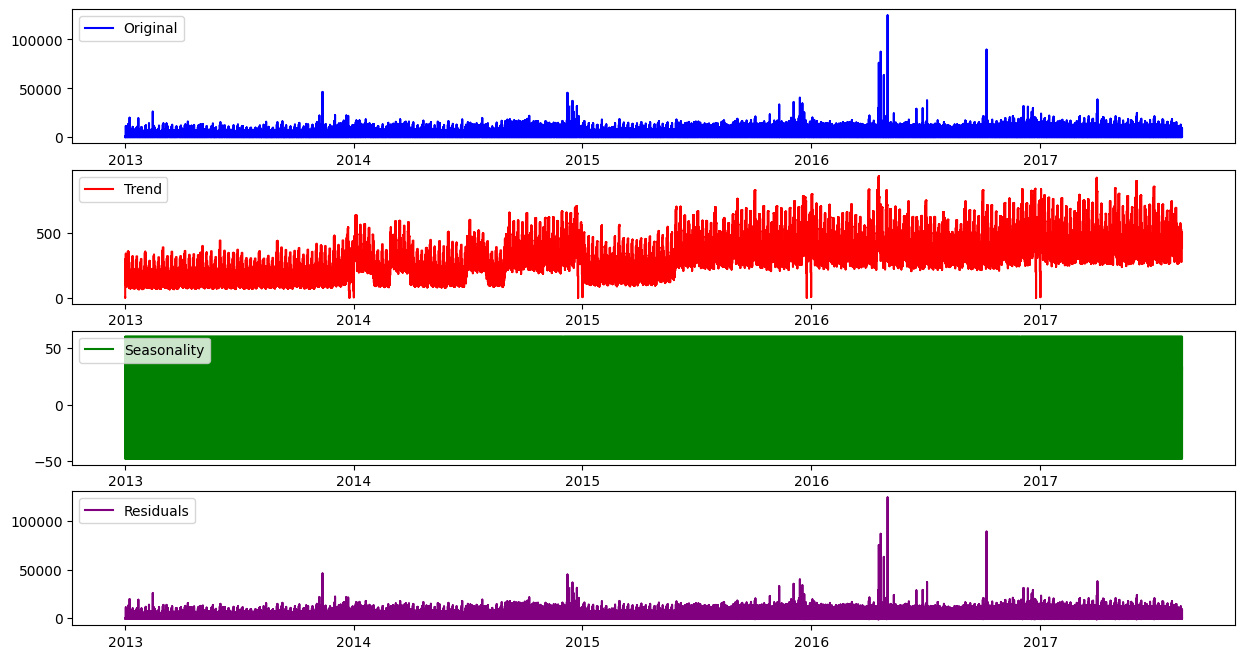

In [19]:
result = seasonal_decompose(train_filled_df['sales'], model='additive', period=1460,)
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the original time series and its components
plt.figure(figsize=(15, 8))
plt.subplot(411)
plt.plot(train_filled_df['sales'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='purple')
plt.legend(loc='upper left')
plt.show()

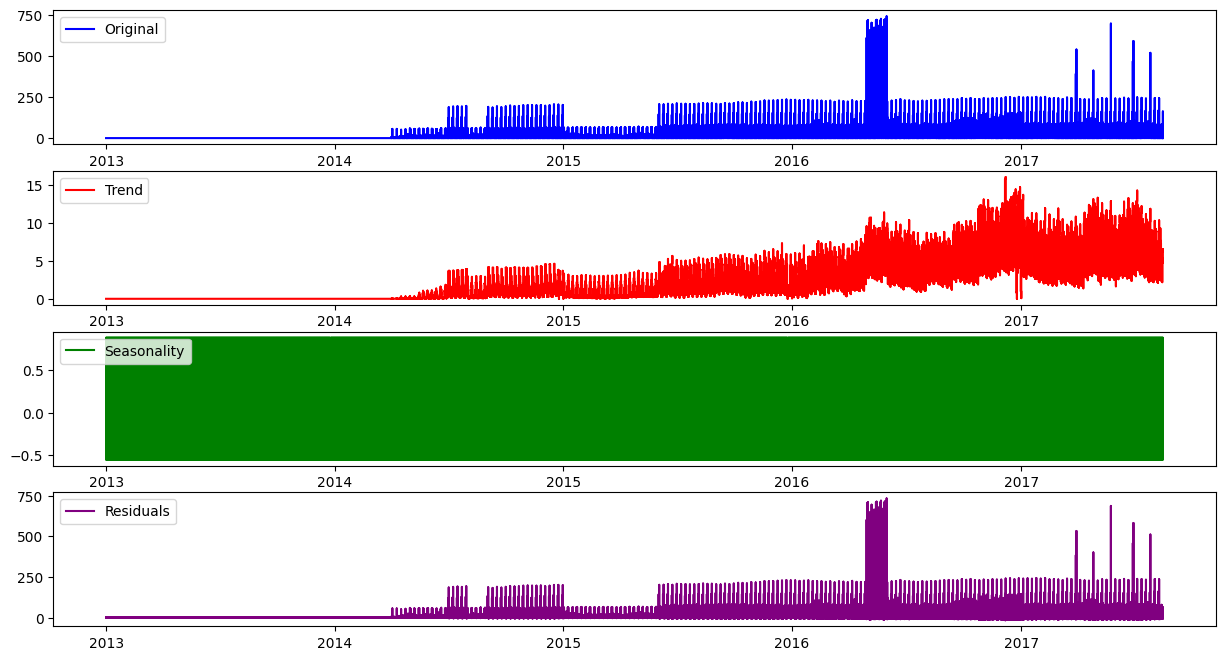

In [20]:
result_promo = seasonal_decompose(train_filled_df['onpromotion'], model='additive', period=1460,)
trend = result_promo.trend
seasonal = result_promo.seasonal
residual = result_promo.resid

# Plot the original time series and its components
plt.figure(figsize=(15, 8))
plt.subplot(411)
plt.plot(train_filled_df['onpromotion'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='purple')
plt.legend(loc='upper left')
plt.show()

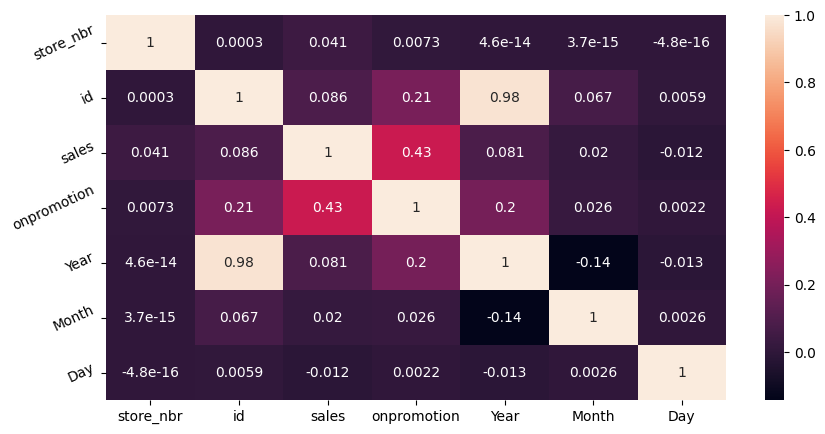

In [27]:
plt.figure(figsize=(10, 5))
sns.heatmap(data=train_filled_df.drop(['family', 'Month_name', 'Day_name'], axis=1).corr(), annot=True, )
plt.yticks(rotation=25)
plt.show()

In [44]:
print(holiday_df.head())


         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  


QUESTION 1

In [21]:
start_day = train_df['date'].min()
end_day = train_df['date'].max()

every_date = pd.date_range(start_day,end_day,freq = 'D')

existing_date = train_df.date

missing_date = every_date.difference(existing_date)
missing_date

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

QUESTION 2 

In [22]:
open_days = train_filled_df[train_filled_df['sales']>0]

In [23]:
daily_sales = open_days.groupby(['Year', 'Month_name', 'Day'])['sales'].sum().sort_values(ascending = False).reset_index()

In [24]:
lowest_sales_dates = daily_sales.loc[daily_sales.groupby('Year')['sales'].idxmin()]
highest_sales_dates = daily_sales.loc[daily_sales.groupby('Year')['sales'].idxmax()]


In [25]:
print("Dates with the lowest sales for each year:")
print(lowest_sales_dates)
print("\nDates with the highest sales for each year:")
print(highest_sales_dates)

Dates with the lowest sales for each year:
        Year Month_name  Day         sales
1683  2013.0    January  1.0   2511.618999
1682  2014.0    January  1.0   8602.065404
1680  2015.0    January  1.0  12773.616980
1679  2016.0    January  1.0  16433.394000
1681  2017.0    January  1.0  12082.500997

Dates with the highest sales for each year:
       Year Month_name   Day         sales
402  2013.0   December  23.0  7.928653e+05
86   2014.0   December  23.0  1.064978e+06
14   2015.0    October   4.0  1.234131e+06
3    2016.0      April  18.0  1.345921e+06
0    2017.0      April   1.0  1.463084e+06


### **Question 4**

- **Did the earthquake impact sales? (16 April, 2016)**

In [68]:
train_filled_df['Year'] = pd.to_datetime(train_filled_df['Year']).dt.year

In [69]:
earthquake_month_sales = train_filled_df[(train_filled_df['Month_name'] == 'April') & (train_filled_df['Year'] == 2016)]
earthquake_month_sales

,family,store_nbr,id,sales,onpromotion,Year,Month,Day,Month_name,Day_name
date,,,,,,,,,,


In [28]:
total_sale_earthquake = earthquake_month_sales['sales'].sum()
total_sale_earthquake

0.0

In [29]:
total_daily_sales_april = earthquake_month_sales.groupby(['Year','Month_name','Day'])['sales'].sum().reset_index()
total_daily_sales_april.head()

,Year,Month_name,Day,sales


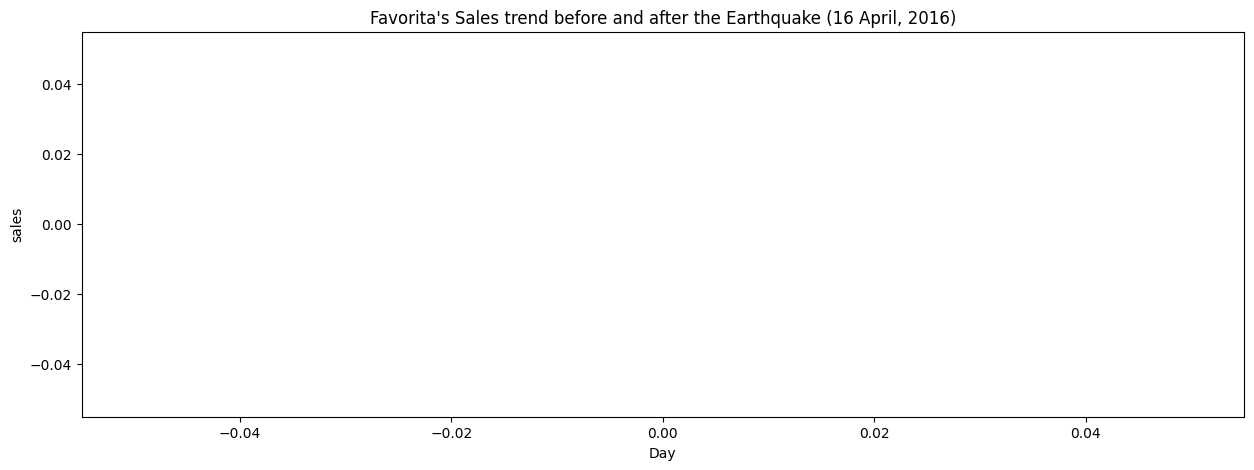

In [30]:
plt.figure(figsize= (15,5))
sns.lineplot(data = total_daily_sales_april, y = 'sales', x = 'Day' )
plt.title('Favorita\'s Sales trend before and after the Earthquake (16 April, 2016)')
plt.show()

In [ ]:
average_before_earthquake = total_daily_sales_april[total_daily_sales_april['Day'] > 16]['sales'].mean()
average_after_earthquake = total_daily_sales_april[total_daily_sales_april['Day'] < 16]['sales'].mean()

In [ ]:
print(f'\nSales on the day of eathquake: {"{:,.2f}".format(total_sale_earthquake)}\nAverage sales before the eathquake: {"{:,.2f}".format(average_before_earthquake)}\n\
Average sales after the eathquake: {"{:,.2f}".format(average_after_earthquake)}')

### Oil df 

In [49]:

print(oil_df.head())


         date  Oil_price
0  2013-01-01  93.139999
1  2013-01-02  93.139999
2  2013-01-03  92.970001
3  2013-01-04  93.120003
4  2013-01-07  93.199997


In [50]:
print(oil_df.dtypes)



date          object
Oil_price    float64
dtype: object


In [51]:
oil_df['date'] = pd.to_datetime(oil_df['date'])


In [52]:
oil_df['Oil_price'] = oil_df['Oil_price'].ffill()

In [53]:
oil_df['Oil_price'] = oil_df['Oil_price'].bfill()

In [54]:
sod_oil= oil_df.date.min()
eod_oil = oil_df.date.max()

In [55]:


oil_range = pd.date_range(sod_oil, eod_oil, freq='D')

oil_range

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-22', '2017-08-23', '2017-08-24', '2017-08-25',
               '2017-08-26', '2017-08-27', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', length=1704, freq='D')

In [56]:
difference=oil_range.difference(oil_df.date)
print(difference)

DatetimeIndex(['2013-01-05', '2013-01-06', '2013-01-12', '2013-01-13',
               '2013-01-19', '2013-01-20', '2013-01-26', '2013-01-27',
               '2013-02-02', '2013-02-03',
               ...
               '2017-07-29', '2017-07-30', '2017-08-05', '2017-08-06',
               '2017-08-12', '2017-08-13', '2017-08-19', '2017-08-20',
               '2017-08-26', '2017-08-27'],
              dtype='datetime64[ns]', length=486, freq=None)


In [57]:
oil_df_filled = pd.merge(pd.DataFrame({'date': oil_range}), oil_df, on='date', how='left')

In [58]:
oil_df_filled

,date,Oil_price
0,2013-01-01,93.139999
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-05,NaN
...,...,...
1699,2017-08-27,NaN
1700,2017-08-28,46.400002
1701,2017-08-29,46.459999
1702,2017-08-30,45.959999


### **Question 5**

- **Are certain stores or groups of stores selling more products? (Cluster, city, state, type)**

### STORE_DF

In [31]:

store_df.head()

,Unnamed: 0,store_nbr,city,state,type,cluster
0,0,1,Quito,Pichincha,D,13
1,1,2,Quito,Pichincha,D,13
2,2,3,Quito,Pichincha,D,8
3,3,4,Quito,Pichincha,D,9
4,4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [32]:
store_df.shape

(54, 6)

In [33]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  54 non-null     int64 
 1   store_nbr   54 non-null     int64 
 2   city        54 non-null     object
 3   state       54 non-null     object
 4   type        54 non-null     object
 5   cluster     54 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.7+ KB


In [34]:
store_df.drop(columns='Unnamed: 0')

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [35]:
train_store_merge = train_filled_df.merge(store_df,on='store_nbr')

In [36]:
train_store_merge

,family,store_nbr,id,sales,onpromotion,Year,Month,Day,Month_name,Day_name,Unnamed: 0,city,state,type,cluster
0,AUTOMOTIVE,1,0.0,0.000,0.0,1970.0,1.0,1.0,January,Tuesday,0,Quito,Pichincha,D,13
1,AUTOMOTIVE,10,33.0,0.000,0.0,1970.0,1.0,1.0,January,Tuesday,9,Quito,Pichincha,C,15
2,AUTOMOTIVE,11,66.0,0.000,0.0,1970.0,1.0,1.0,January,Tuesday,10,Cayambe,Pichincha,B,6
3,AUTOMOTIVE,12,99.0,0.000,0.0,1970.0,1.0,1.0,January,Tuesday,11,Latacunga,Cotopaxi,C,15
4,AUTOMOTIVE,13,132.0,0.000,0.0,1970.0,1.0,1.0,January,Tuesday,12,Latacunga,Cotopaxi,C,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008011,SEAFOOD,54,3000755.0,3.000,0.0,1970.0,8.0,15.0,August,Tuesday,53,El Carmen,Manabi,C,3
3008012,SEAFOOD,6,3000788.0,47.575,0.0,1970.0,8.0,15.0,August,Tuesday,5,Quito,Pichincha,D,13
3008013,SEAFOOD,7,3000821.0,46.507,0.0,1970.0,8.0,15.0,August,Tuesday,6,Quito,Pichincha,D,8
3008014,SEAFOOD,8,3000854.0,23.330,0.0,1970.0,8.0,15.0,August,Tuesday,7,Quito,Pichincha,D,8


In [37]:
train_store_merge.drop(columns= 'Unnamed: 0')

,family,store_nbr,id,sales,onpromotion,Year,Month,Day,Month_name,Day_name,city,state,type,cluster
0,AUTOMOTIVE,1,0.0,0.000,0.0,1970.0,1.0,1.0,January,Tuesday,Quito,Pichincha,D,13
1,AUTOMOTIVE,10,33.0,0.000,0.0,1970.0,1.0,1.0,January,Tuesday,Quito,Pichincha,C,15
2,AUTOMOTIVE,11,66.0,0.000,0.0,1970.0,1.0,1.0,January,Tuesday,Cayambe,Pichincha,B,6
3,AUTOMOTIVE,12,99.0,0.000,0.0,1970.0,1.0,1.0,January,Tuesday,Latacunga,Cotopaxi,C,15
4,AUTOMOTIVE,13,132.0,0.000,0.0,1970.0,1.0,1.0,January,Tuesday,Latacunga,Cotopaxi,C,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008011,SEAFOOD,54,3000755.0,3.000,0.0,1970.0,8.0,15.0,August,Tuesday,El Carmen,Manabi,C,3
3008012,SEAFOOD,6,3000788.0,47.575,0.0,1970.0,8.0,15.0,August,Tuesday,Quito,Pichincha,D,13
3008013,SEAFOOD,7,3000821.0,46.507,0.0,1970.0,8.0,15.0,August,Tuesday,Quito,Pichincha,D,8
3008014,SEAFOOD,8,3000854.0,23.330,0.0,1970.0,8.0,15.0,August,Tuesday,Quito,Pichincha,D,8


In [38]:
sales_by_scct = train_store_merge[['cluster','city','state','type','store_nbr']]

for column in sales_by_scct.columns:
    Top_sales = train_store_merge.groupby(column)['sales'].sum().sort_values(ascending= False).head(10).reset_index()
    print(f'Top_sales by {column}\n {Top_sales}')

Top_sales by cluster
    cluster         sales
0       14  1.574305e+08
1        6  1.142544e+08
2        8  1.079282e+08
3       11  1.006143e+08
4       10  8.532443e+07
5        3  7.562870e+07
6       13  7.210225e+07
7        5  6.208755e+07
8       15  5.529695e+07
9        1  5.437675e+07
Top_sales by city
             city         sales
0          Quito  5.567418e+08
1      Guayaquil  1.229673e+08
2         Cuenca  4.916860e+07
3         Ambato  4.030440e+07
4  Santo Domingo  3.583432e+07
5        Machala  3.338680e+07
6        Cayambe  2.832556e+07
7      Latacunga  2.118226e+07
8          Daule  1.918802e+07
9           Loja  1.886000e+07
Top_sales by state
                             state         sales
0                       Pichincha  5.850674e+08
1                          Guayas  1.651544e+08
2                           Azuay  4.916860e+07
3                      Tungurahua  4.030440e+07
4  Santo Domingo de los Tsachilas  3.583432e+07
5                          El Oro  

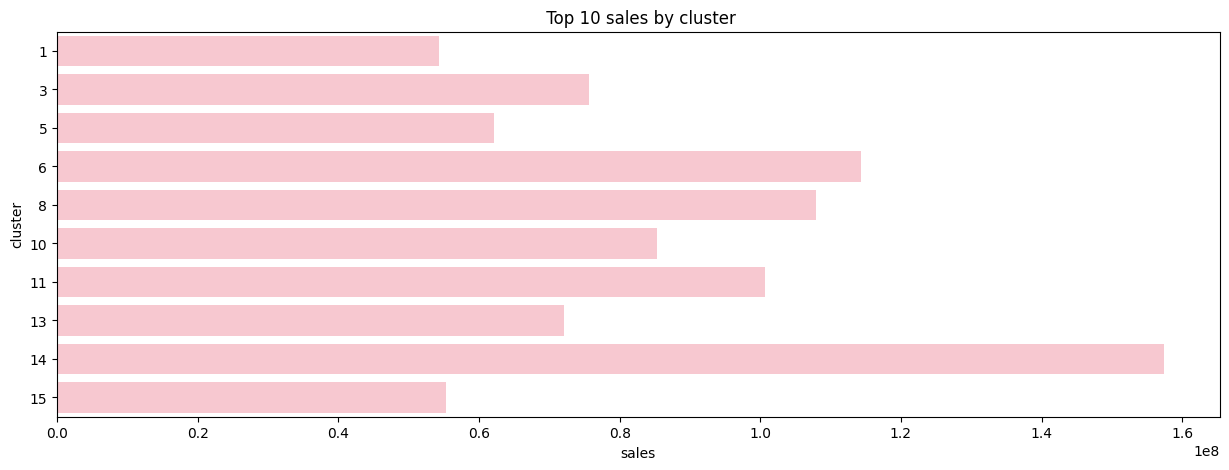

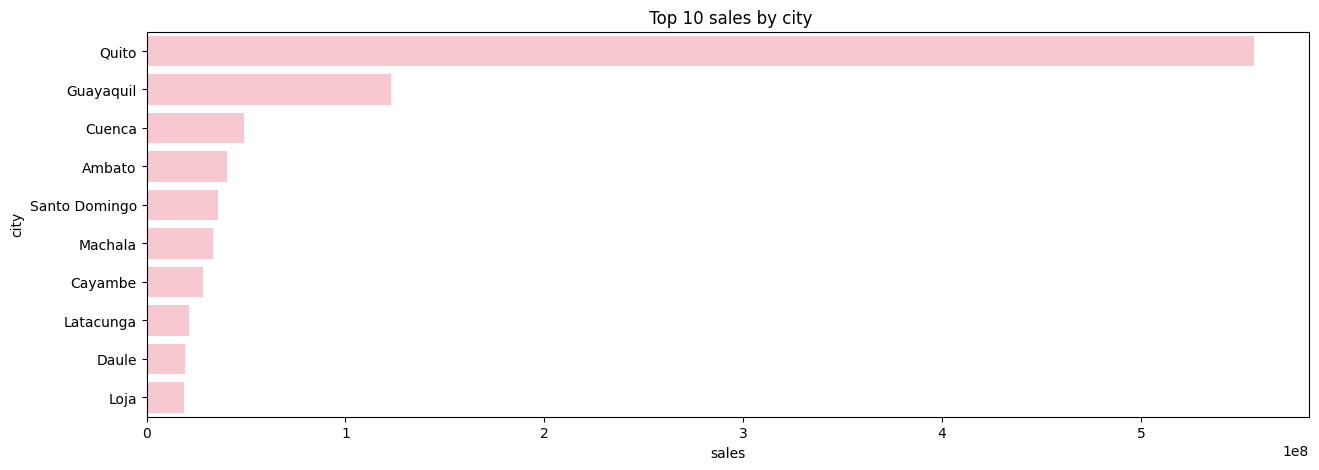

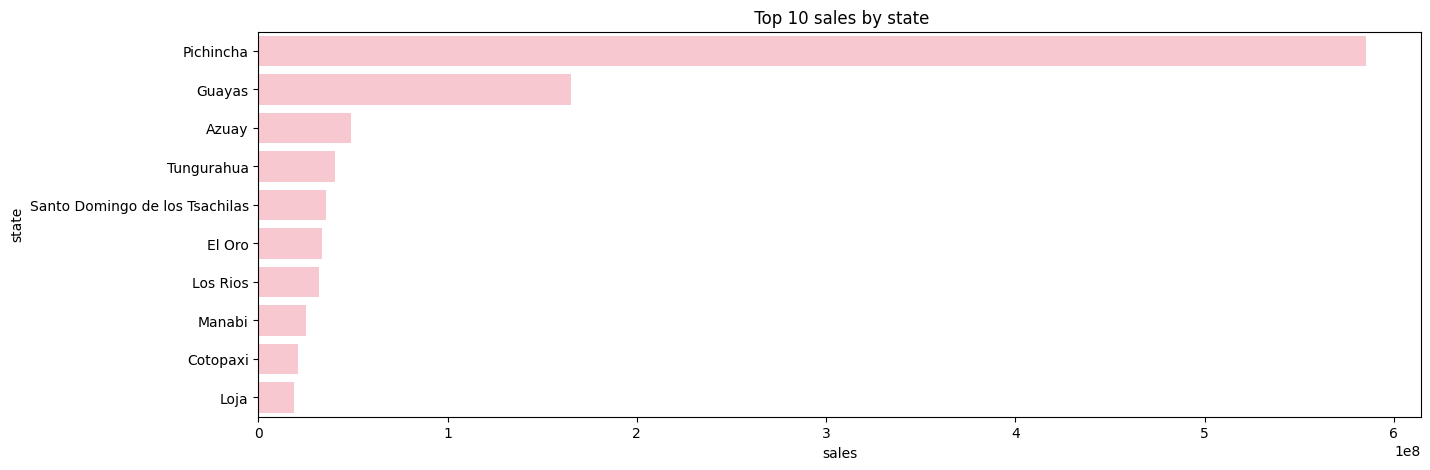

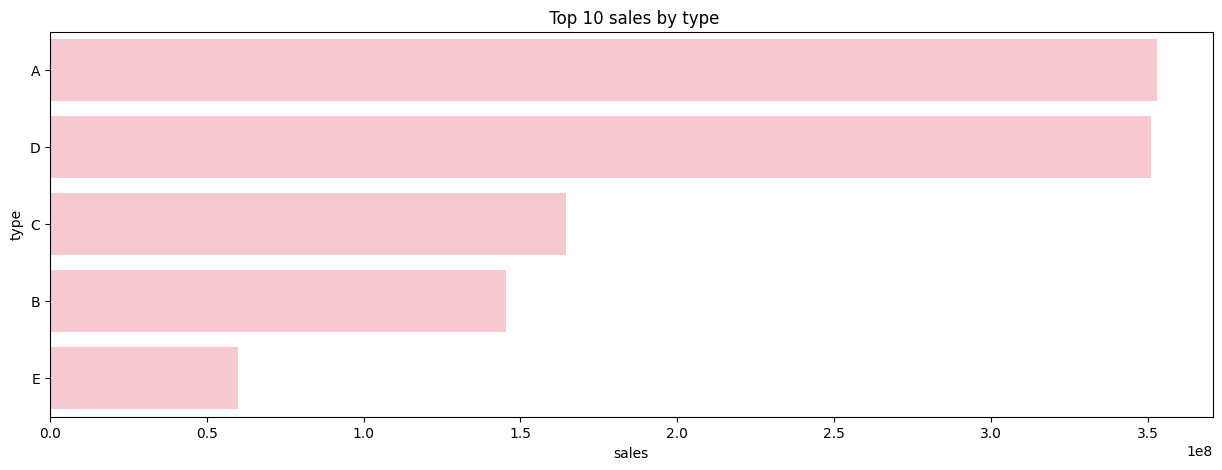

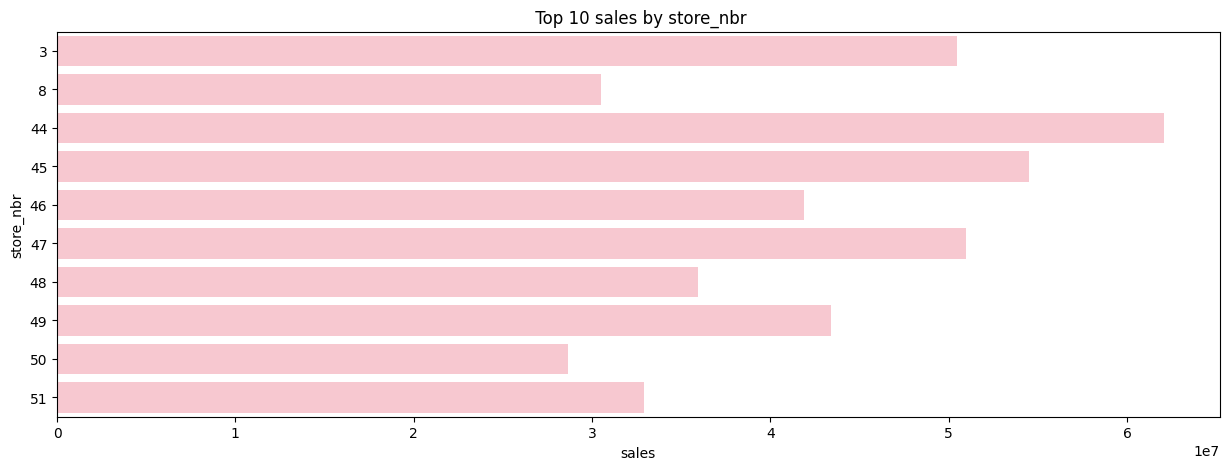

In [39]:
for column in sales_by_scct.columns:
    Top_sales = train_store_merge.groupby(column)['sales'].sum().sort_values(ascending= False).head(10).reset_index()
    plt.figure(figsize = (15,5))
    sns.barplot(data = Top_sales, x = 'sales', y = column, orient = 'h', color='pink')
    plt.title(f' Top 10 sales by {column}')
    plt.show()

In [40]:
numeric_columns =train_store_merge.select_dtypes(include='number')

# Group by 'family' column and sum the numeric columns
result = train_store_merge.groupby('state')['sales'].sum()



In [41]:
result

state
Azuay                             4.916860e+07
Bolivar                           1.304951e+07
Chimborazo                        1.138792e+07
Cotopaxi                          2.118226e+07
El Oro                            3.338680e+07
Esmeraldas                        1.639169e+07
Guayas                            1.651544e+08
Imbabura                          1.145127e+07
Loja                              1.886000e+07
Los Rios                          3.192537e+07
Manabi                            2.496982e+07
Pastaza                           4.090202e+06
Pichincha                         5.850674e+08
Santa Elena                       1.142100e+07
Santo Domingo de los Tsachilas    3.583432e+07
Tungurahua                        4.030440e+07
Name: sales, dtype: float64

### **Question 6**
- **Are sales affected by promotions, oil prices and holidays?**

In [105]:
oil_df.head()

,Oil_price,Year,Month,Day,Month_name,Day_name
date,,,,,,
2013-01-01,93.139999,2013,1,1,January,Tuesday
2013-01-02,93.139999,2013,1,2,January,Wednesday
2013-01-03,92.970001,2013,1,3,January,Thursday
2013-01-04,93.120003,2013,1,4,January,Friday
2013-01-07,93.199997,2013,1,7,January,Monday


In [107]:
oil_df.reset_index()

,date,Oil_price,Year,Month,Day,Month_name,Day_name
0,2013-01-01,93.139999,2013,1,1,January,Tuesday
1,2013-01-02,93.139999,2013,1,2,January,Wednesday
2,2013-01-03,92.970001,2013,1,3,January,Thursday
3,2013-01-04,93.120003,2013,1,4,January,Friday
4,2013-01-07,93.199997,2013,1,7,January,Monday
...,...,...,...,...,...,...,...
1213,2017-08-25,47.650002,2017,8,25,August,Friday
1214,2017-08-28,46.400002,2017,8,28,August,Monday
1215,2017-08-29,46.459999,2017,8,29,August,Tuesday
1216,2017-08-30,45.959999,2017,8,30,August,Wednesday


In [115]:
oil_start_date = oil_df.index.min()
oil_end_date = oil_df.index.max()

print(f'Oil data start date: {oil_start_date}\nOil data end date: {oil_end_date}')

Oil data start date: 2013-01-01 00:00:00
Oil data end date: 2017-08-31 00:00:00


In [116]:
train_oil_df = pd.merge(train_filled_df, oil_df, on = ['date','Year','Month','Day','Month_name','Day_name'], how = 'left')
train_oil_df.head()

,family,store_nbr,id,sales,onpromotion,Year,Month,Day,Month_name,Day_name,Oil_price
date,,,,,,,,,,,
2013-01-01,AUTOMOTIVE,1,0.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday,NaN
2013-01-01,AUTOMOTIVE,10,33.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday,NaN
2013-01-01,AUTOMOTIVE,11,66.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday,NaN
2013-01-01,AUTOMOTIVE,12,99.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday,NaN
2013-01-01,AUTOMOTIVE,13,132.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday,NaN


In [117]:
holiday_df.head()

,type,locale,locale_name,description,transferred,Year,Month,Day,Month_name,Day_name
date,,,,,,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,2012,3,2,March,Friday
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,2012,4,1,April,Sunday
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,2012,4,12,April,Thursday
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,2012,4,14,April,Saturday
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,2012,4,21,April,Saturday


In [94]:
holiday_df.isna().sum()

type           0
locale         0
locale_name    0
description    0
transferred    0
Year           0
Month          0
Day            0
Month_name     0
Day_name       0
dtype: int64

In [73]:
holiday_df = holiday_df.set_index('date')

In [119]:
#Inner merge since the date range in holidays data is wider than that of train_oil_df
train_oil_hday_df = pd.merge(train_oil_df, holiday_df, on=['date','Year', 'Month', 'Day', 'Month_name', 'Day_name'], how='left')
train_oil_hday_df.head()

,family,store_nbr,id,sales,onpromotion,Year,Month,Day,Month_name,Day_name,Oil_price,type,locale,locale_name,description,transferred
date,,,,,,,,,,,,,,,,
2013-01-01,AUTOMOTIVE,1,0.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,AUTOMOTIVE,10,33.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,AUTOMOTIVE,11,66.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,AUTOMOTIVE,12,99.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,AUTOMOTIVE,13,132.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
train_oil_hday_df_start_date =train_oil_hday_df.index.min()
train_oil_hday_df_end_date =train_oil_hday_df.index.max()

print(f'train oil hday data start date: {train_oil_hday_df_start_date}\ntrain oil hday data_end date: {train_oil_hday_df_end_date}')

train oil hday data start date: 2013-01-01 00:00:00
train oil hday data_end date: 2017-08-15 00:00:00


In [76]:
train_oil_hday_df.duplicated().sum()

5346

In [77]:
train_oil_hday_df.isna().sum()

family               0
store_nbr            0
id                7128
sales                0
onpromotion          0
Year              7128
Month             7128
Day               7128
Month_name        7128
Day_name          7128
Oil_price      3008016
type           3008016
locale         3008016
locale_name    3008016
description    3008016
transferred    3008016
dtype: int64

In [121]:
train_oil_hday_df['Oil_price'] = train_oil_hday_df['Oil_price'].ffill()

In [122]:
train_oil_hday_df['Oil_price'] = train_oil_hday_df['Oil_price'].bfill()

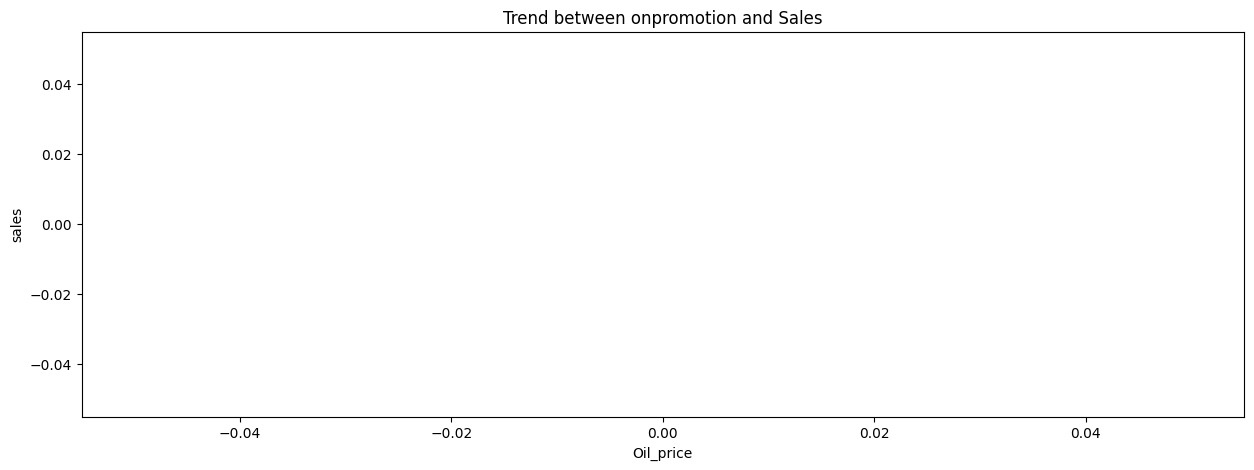

In [123]:
plt.figure(figsize = (15,5))
sns.lineplot(data = train_oil_hday_df,y = 'sales', x = 'Oil_price', marker='o', linestyle='-')
plt.title('Trend between onpromotion and Sales') 
plt.show()

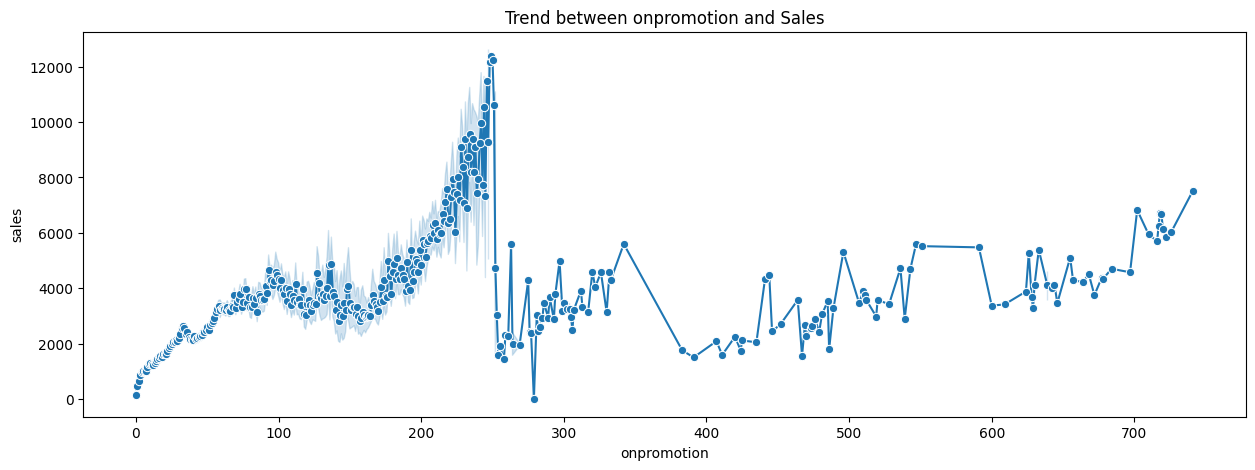

In [80]:
plt.figure(figsize = (15,5))
sns.lineplot(data = train_oil_hday_df,y = 'sales', x = 'onpromotion', marker='o', linestyle='-')
plt.title('Trend between onpromotion and Sales') 
plt.show()

**question 7

In [124]:
train_oil_hday_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3008016 entries, 2013-01-01 to 2017-08-15
Data columns (total 16 columns):
 #   Column       Dtype  
---  ------       -----  
 0   family       object 
 1   store_nbr    int64  
 2   id           float64
 3   sales        float64
 4   onpromotion  float64
 5   Year         float64
 6   Month        float64
 7   Day          float64
 8   Month_name   object 
 9   Day_name     object 
 10  Oil_price    float64
 11  type         object 
 12  locale       object 
 13  locale_name  object 
 14  description  object 
 15  transferred  object 
dtypes: float64(7), int64(1), object(8)
memory usage: 390.1+ MB


In [125]:
train_oil_hday_df['Year'] = pd.to_datetime(train_oil_hday_df['Year'], format='%Y')

WHICH PRODUCT OR FAMILY DID THE PROMOTIONS AFFECT

In [128]:
train_filled_df.head()

,family,store_nbr,id,sales,onpromotion,Year,Month,Day,Month_name,Day_name
date,,,,,,,,,,
2013-01-01,AUTOMOTIVE,1,0.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday
2013-01-01,AUTOMOTIVE,10,33.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday
2013-01-01,AUTOMOTIVE,11,66.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday
2013-01-01,AUTOMOTIVE,12,99.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday
2013-01-01,AUTOMOTIVE,13,132.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday


In [129]:
promo = train_filled_df[['family', 'sales','onpromotion','store_nbr']]

yes_promo = train_filled_df[train_filled_df['onpromotion'] > 0]

In [130]:
family_affect = yes_promo.groupby(['family']).agg({'sales': 'sum', 'onpromotion': 'sum'}).sort_values(by= 'sales', ascending = False)
family_affect.head()

,sales,onpromotion
family,,
GROCERY I,2.509243e+08,1914801.0
BEVERAGES,1.662573e+08,906958.0
PRODUCE,7.505817e+07,1117921.0
CLEANING,6.188652e+07,661157.0
DAIRY,4.291972e+07,728707.0


C:\Users\User\AppData\Local\Temp\ipykernel_4952\4270801251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = family_affect, y = 'onpromotion', x = 'family', palette='Set2')


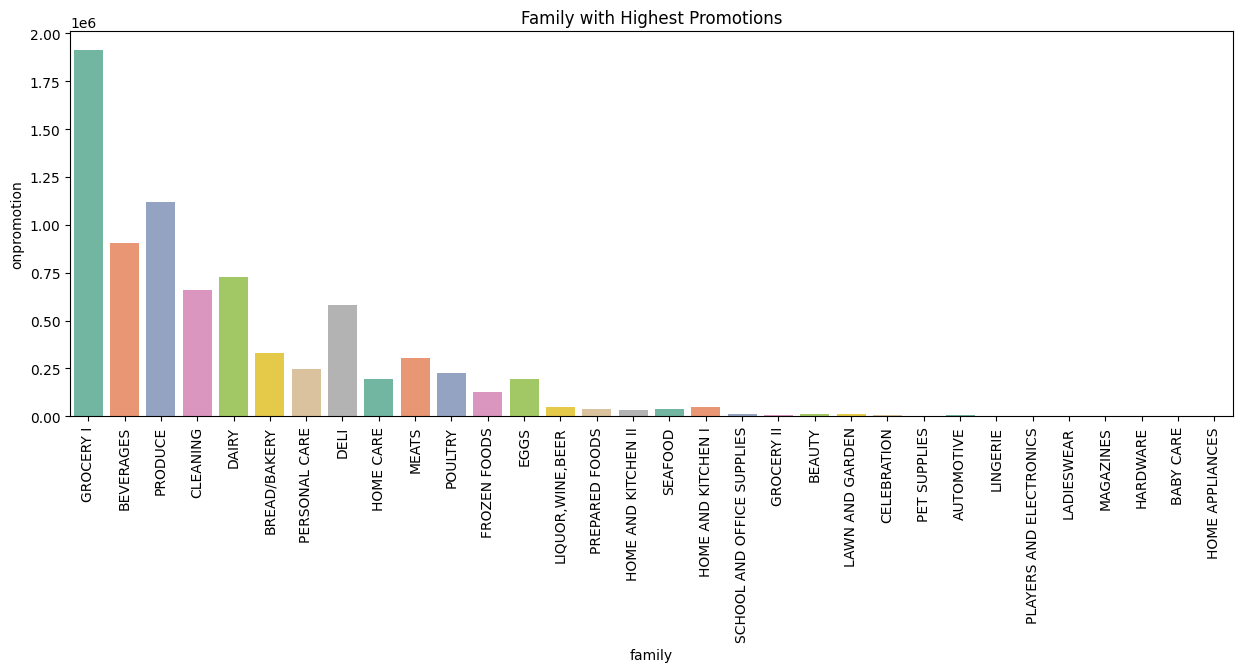

In [131]:
plt.figure(figsize=(15,5))
sns.barplot(data = family_affect, y = 'onpromotion', x = 'family', palette='Set2')
plt.title('Family with Highest Promotions')
plt.xticks(rotation=90)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4952\1577294142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = family_affect, y = 'sales', x = 'family', palette='Set2')


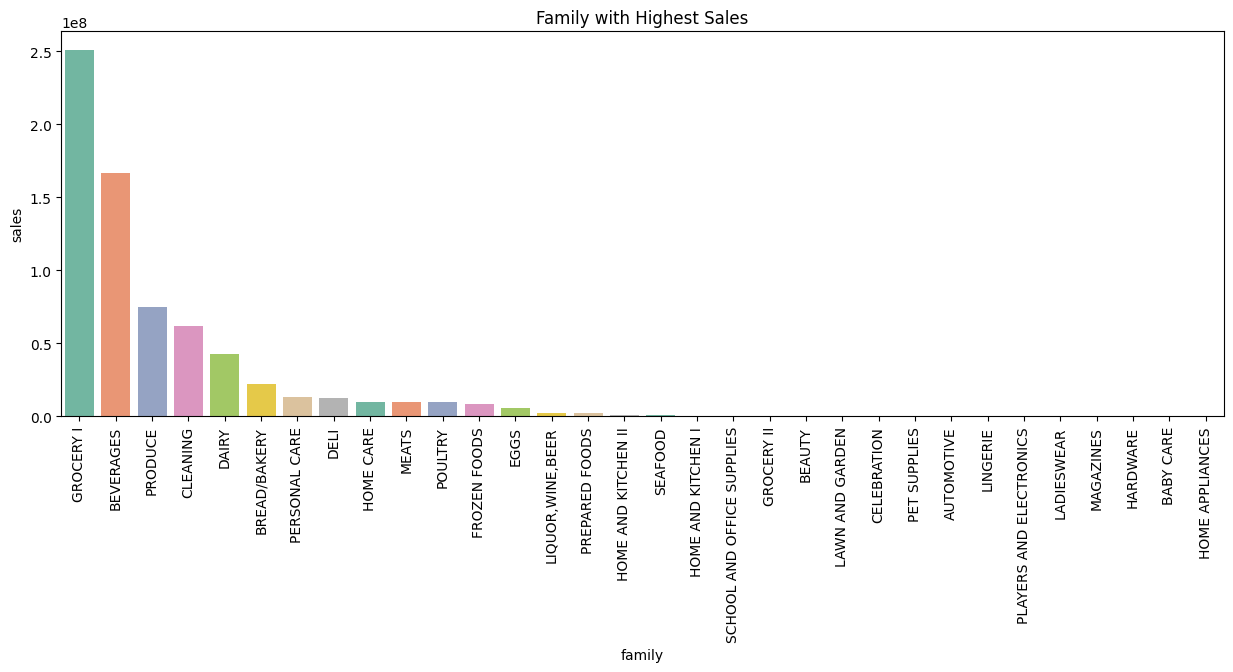

In [132]:
plt.figure(figsize=(15,5))
sns.barplot(data = family_affect, y = 'sales', x = 'family', palette='Set2')
plt.title('Family with Highest Sales')
plt.xticks(rotation=90)
plt.show()

In [133]:
store_affect = yes_promo.groupby(['store_nbr']).agg({'sales': 'sum', 'onpromotion': 'sum'}).sort_values(by= 'sales', ascending = False)
store_affect.head()

,sales,onpromotion
store_nbr,,
44,3.945148e+07,192449.0
45,3.596631e+07,191503.0
47,3.410729e+07,192725.0
3,3.280954e+07,177075.0
49,2.955136e+07,184736.0


C:\Users\User\AppData\Local\Temp\ipykernel_4952\3944818645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = store_affect, y = 'onpromotion', x = 'store_nbr', palette='Set2')


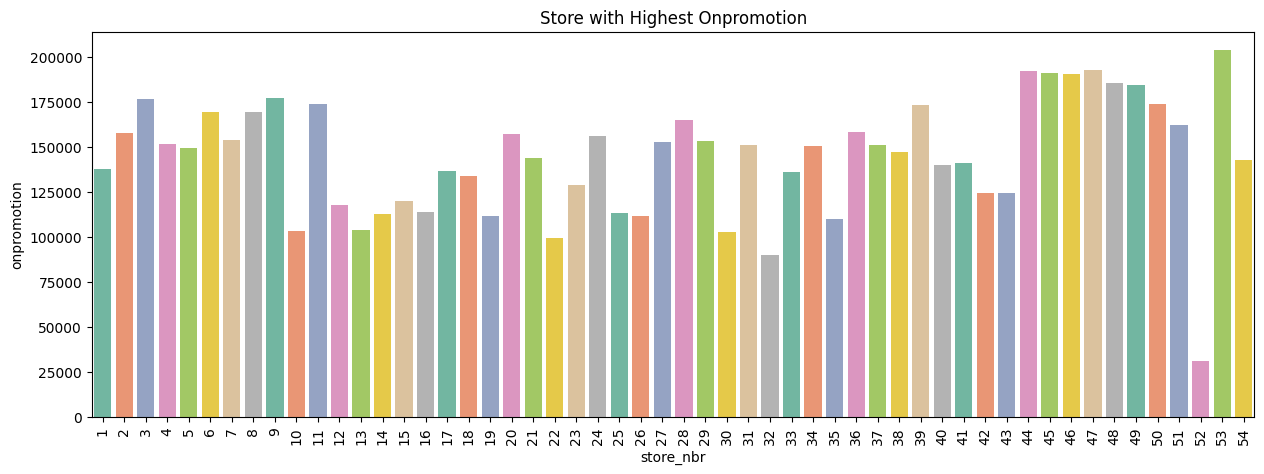

In [134]:
plt.figure(figsize=(15,5))
sns.barplot(data = store_affect, y = 'onpromotion', x = 'store_nbr', palette='Set2')
plt.title('Store with Highest Onpromotion')
plt.xticks(rotation=90)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4952\1489552800.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = store_affect, y = 'sales', x = 'store_nbr', palette='Set2')


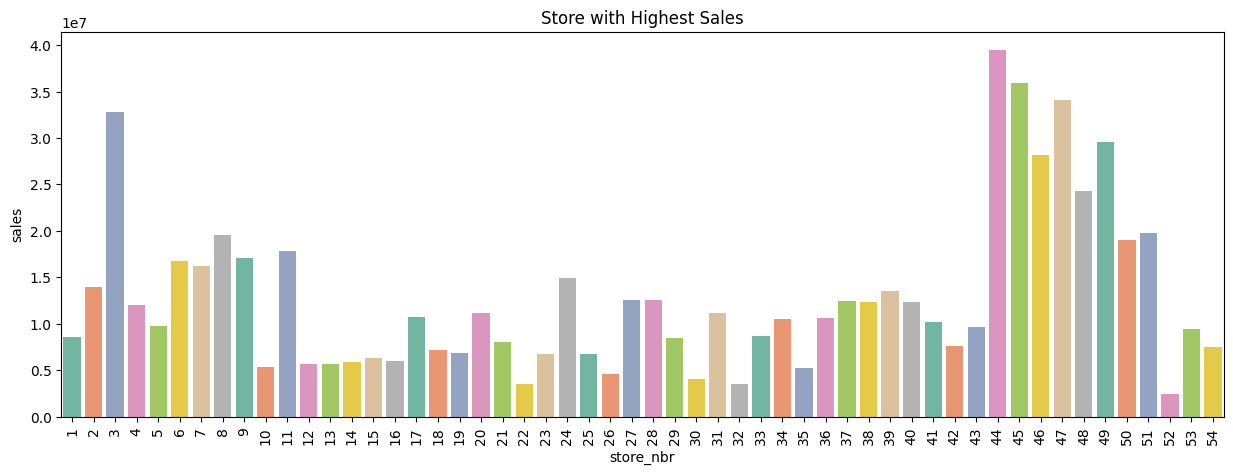

In [135]:
plt.figure(figsize=(15,5))
sns.barplot(data = store_affect, y = 'sales', x = 'store_nbr', palette='Set2')
plt.title('Store with Highest Sales')
plt.xticks(rotation=90)
plt.show()

QUESTION 10

In [136]:
daily_sales = train_filled_df.groupby('Day')['sales'].sum().reset_index()
daily_sales.head()

,Day,sales
0,1.0,3.987456e+07
1,2.0,4.163474e+07
2,3.0,4.013225e+07
3,4.0,3.919899e+07
4,5.0,3.829552e+07


C:\Users\User\AppData\Local\Temp\ipykernel_4952\1907628853.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = daily_sales, y ='sales', x = 'Day', palette='Set2')


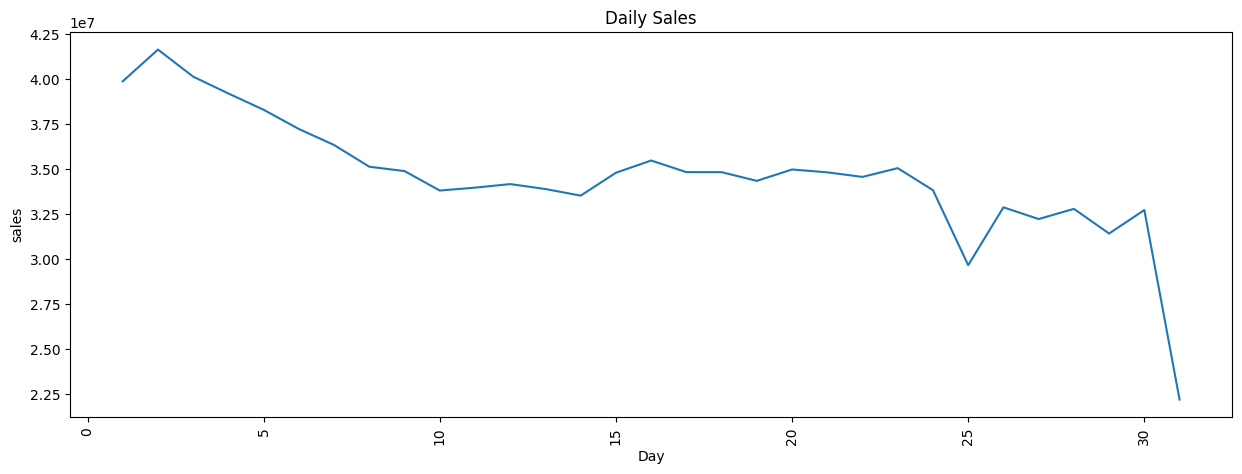

In [137]:
# plot the daily sales
plt.figure(figsize=(15,5))
sns.lineplot(data = daily_sales, y ='sales', x = 'Day', palette='Set2')
plt.title('Daily Sales')
plt.xticks(rotation=90)
plt.show()


### HYPOTHESIS 

# 1 

- Null hypothesis : Products on promotions have higher or equal averages sales compared those that are not on promotion
- Alternative hypothesis: Products on promotions have lesser averages sales compared those that are not on promotion

TEST: Mann-whitneyu-test 

In [139]:
products_promotion = train_filled_df[train_filled_df['onpromotion'] > 0.00]['sales']
products_nonpromotion = train_filled_df[train_filled_df['onpromotion'] == 0.00]['sales']

In [144]:
u_stat, p_value = mannwhitneyu(products_promotion, products_nonpromotion, alternative='less')

# Print the results
print(f"U-statistic: {u_stat}, P-value: {p_value}")

U-statistic: 1278392108506.5, P-value: 1.0


### Data Preparation 

Making the Data Stationary
**Making the Data Stationary**

- De-trending: Differencing and Seasonal Differencing: y(t) = y(t) - y(t-1)
- Rolling Statistics - Moving averages
- Transformation log, sqrt, cbrt + Differencing 


In [145]:
train_filled_df.head()

,family,store_nbr,id,sales,onpromotion,Year,Month,Day,Month_name,Day_name
date,,,,,,,,,,
2013-01-01,AUTOMOTIVE,1,0.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday
2013-01-01,AUTOMOTIVE,10,33.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday
2013-01-01,AUTOMOTIVE,11,66.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday
2013-01-01,AUTOMOTIVE,12,99.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday
2013-01-01,AUTOMOTIVE,13,132.0,0.0,0.0,1970.0,1.0,1.0,January,Tuesday


In [146]:
import numpy as np
train_filled_df['sales_log'] = np.log(train_filled_df['sales'])


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [147]:
train_filled_df['sales_log']

date
2013-01-01        -inf
2013-01-01        -inf
2013-01-01        -inf
2013-01-01        -inf
2013-01-01        -inf
                ...   
2017-08-15    1.098612
2017-08-15    3.862307
2017-08-15    3.839603
2017-08-15    3.149740
2017-08-15    2.772589
Name: sales_log, Length: 3008016, dtype: float64

In [148]:

# Perform differencing on the log-transformed sales
train_filled_df['sales_diff'] = train_filled_df['sales'] - train_filled_df['sales'].shift(1)

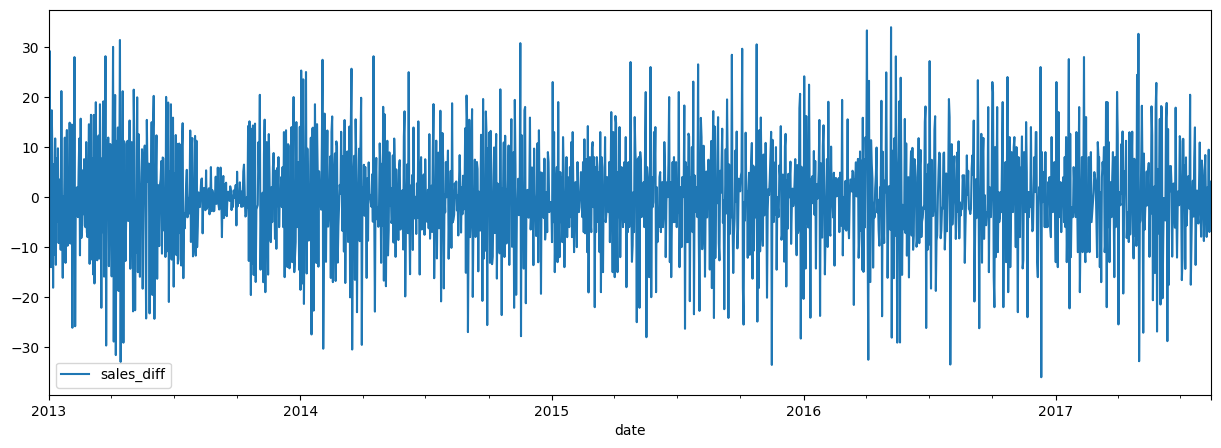

In [149]:
differenced_df = train_filled_df.groupby(['date'])['sales_diff'].sum().reset_index()

# Set 'date' column as the index
differenced_df.set_index('date', inplace=True)
differenced_df.plot(figsize=(15,5))
plt.show()

In [150]:
sales_df = train_filled_df.groupby(train_filled_df.index)['sales'].sum().reset_index()

In [151]:
sales_df['moving_average'] = sales_df['sales'].rolling(window = 30).mean()

In [152]:
train_filled_df['sales_diff']

date
2013-01-01       NaN
2013-01-01     0.000
2013-01-01     0.000
2013-01-01     0.000
2013-01-01     0.000
               ...  
2017-08-15    -2.000
2017-08-15    44.575
2017-08-15    -1.068
2017-08-15   -23.177
2017-08-15    -7.330
Name: sales_diff, Length: 3008016, dtype: float64

In [153]:
train_filled_df.isna().sum()

family            0
store_nbr         0
id             7128
sales             0
onpromotion       0
Year           7128
Month          7128
Day            7128
Month_name     7128
Day_name       7128
sales_log         0
sales_diff        1
dtype: int64

In [154]:
differenced_df 

,sales_diff
date,
2013-01-01,0.000000
2013-01-02,29.214000
2013-01-03,-4.214000
2013-01-04,-14.000000
2013-01-05,17.361000
...,...
2017-08-11,9.481000
2017-08-12,-6.971999
2017-08-13,3.140999


In [155]:
diff_df = train_filled_df.groupby(train_filled_df.index)['sales_diff'].sum().reset_index()

In [156]:
diff_df

,date,sales_diff
0,2013-01-01,0.000000
1,2013-01-02,29.214000
2,2013-01-03,-4.214000
3,2013-01-04,-14.000000
4,2013-01-05,17.361000
...,...,...
1683,2017-08-11,9.481000
1684,2017-08-12,-6.971999
1685,2017-08-13,3.140999
1686,2017-08-14,-3.000000


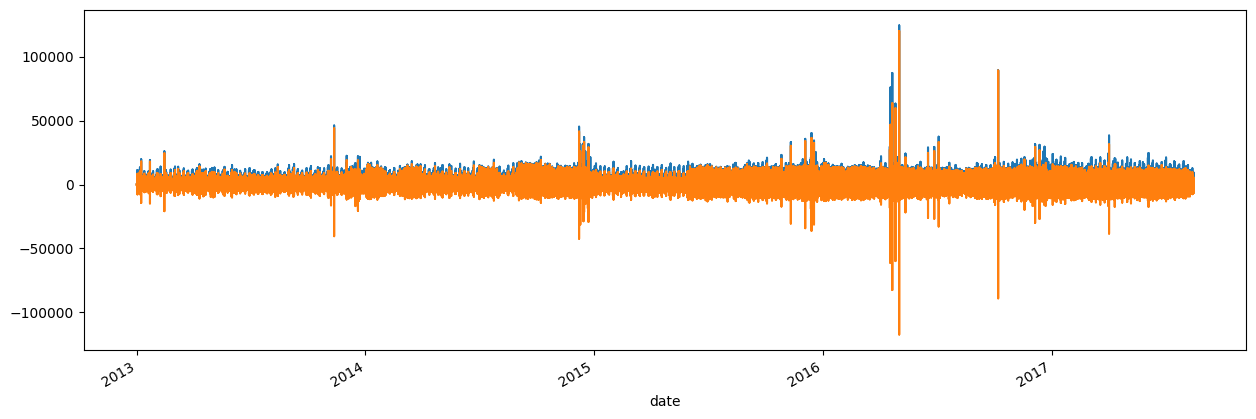

In [157]:
differenced_df = train_filled_df.groupby(['date'])['sales_diff'].sum().reset_index()

# Set 'date' column as the index
differenced_df.set_index('date', inplace=True)
train_filled_df['sales'].plot(figsize=(15,5))
train_filled_df['sales_diff'].plot(figsize=(15,5))
plt.show()

In [158]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'train_filled_df' is your DataFrame and 'sales' is the column you want to test

result = adfuller(differenced_df['sales_diff'])

# Extracting and printing the results
#print('ADF Statistic:', result[0])
#print('p-value:', result[1])

if result[1] < 0.05:
    print('data is stationary')

else:
    print('data is not stationary')


data is stationary


<Axes: xlabel='date'>

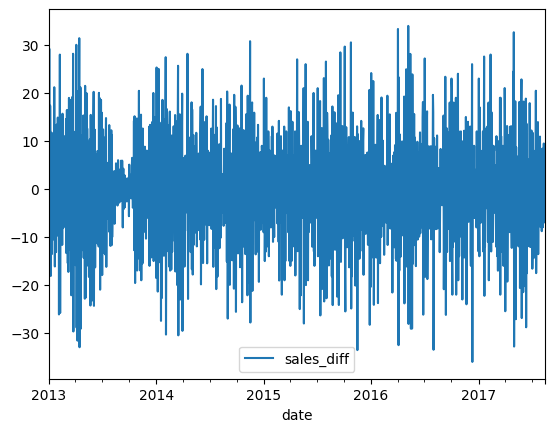

In [159]:
differenced_df.plot()

<Axes: >

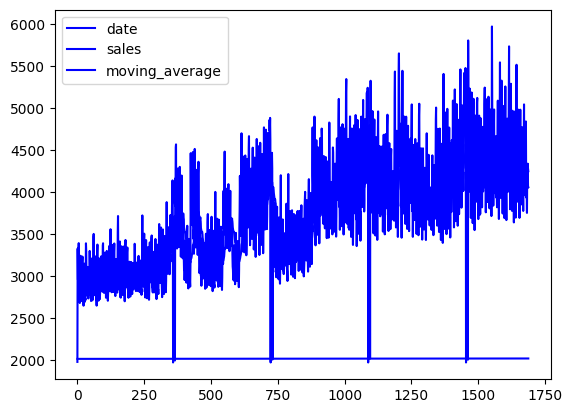

In [160]:
sales_df.plot(label='Original', color='blue')

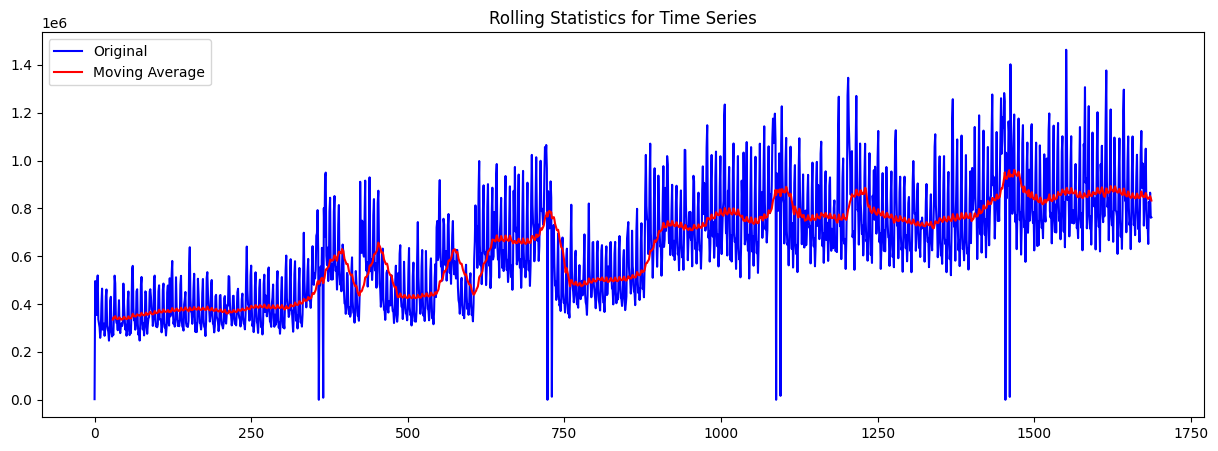

In [161]:
plt.figure(figsize=(15,5))
plt.plot(sales_df['sales'], label='Original', color='blue')
plt.plot(sales_df['moving_average'], label='Moving Average', color='red')
plt.title('Rolling Statistics for Time Series')
plt.legend()
plt.show()

In [162]:
# Assuming 'differenced_df' is your DataFrame and 'date' is one of the columns

# Filter rows with dates greater than or equal to '2015-08-15'
test_data = differenced_df[differenced_df.index >= '2016-08-15']

# Filter rows with dates less than '2015-08-15'
train_data = differenced_df[differenced_df.index < '2016-08-15']

# Print the number of rows in each filtered DataFrame
print("Number of rows with dates greater than or equal to '2016-08-15':", test_data)
print("Number of rows with dates less than '2016-08-15':", train_data)


Number of rows with dates greater than or equal to '2016-08-15':             sales_diff
date                  
2016-08-15   -1.044001
2016-08-16   -3.683000
2016-08-17   -2.066000
2016-08-18   -2.362000
2016-08-19    4.370999
...                ...
2017-08-11    9.481000
2017-08-12   -6.971999
2017-08-13    3.140999
2017-08-14   -3.000000
2017-08-15   -1.000000

[366 rows x 1 columns]
Number of rows with dates less than '2016-08-15':             sales_diff
date                  
2013-01-01    0.000000
2013-01-02   29.214000
2013-01-03   -4.214000
2013-01-04  -14.000000
2013-01-05   17.361000
...                ...
2016-08-10   -3.701000
2016-08-11    8.911000
2016-08-12   -2.904000
2016-08-13   11.149001
2016-08-14   -8.250000

[1322 rows x 1 columns]


In [163]:
train_data

,sales_diff
date,
2013-01-01,0.000000
2013-01-02,29.214000
2013-01-03,-4.214000
2013-01-04,-14.000000
2013-01-05,17.361000
...,...
2016-08-10,-3.701000
2016-08-11,8.911000
2016-08-12,-2.904000


In [164]:
from pmdarima import auto_arima

# Assuming you already imported 'train_data' DataFrame

sarima_model = auto_arima(
    train_data['sales_diff'], seasonal=True, m=7, stepwise=True)

print(sarima_model.summary())


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1322
Model:             SARIMAX(4, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -4469.499
Date:                           Thu, 30 May 2024   AIC                           8956.999
Time:                                   23:30:05   BIC                           9003.681
Sample:                               01-01-2013   HQIC                          8974.500
                                    - 08-14-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -7.933e-07      0.000     -0.002      0.999      -0.001       0.001
ar.L1          0.1841      0.027      6.806

In [165]:
print('Sarima Model', sarima_model.order)
print('Seasonal Order', sarima_model.seasonal_order)

Sarima Model (4, 0, 1)
Seasonal Order (1, 0, 1, 7)


In [166]:
sarima_model.fit(train_data['sales_diff'])

ARIMA(order=(4, 0, 1), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [167]:
n_test_period = len(test_data)

In [169]:
forecast= sarima_model.predict(n_periods=n_test_period)

In [170]:
forecast

2016-08-15   -4.221597
2016-08-16   -0.908396
2016-08-17   -2.929984
2016-08-18    0.061417
2016-08-19    0.550192
                ...   
2017-08-11    0.025473
2017-08-12    7.445379
2017-08-13    2.170152
2017-08-14   -7.554456
2017-08-15   -0.800695
Freq: D, Length: 366, dtype: float64

In [171]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

mae = mean_absolute_error (test_data['sales_diff'], forecast)
rmse = np.sqrt(mean_squared_error(test_data['sales_diff'],forecast))


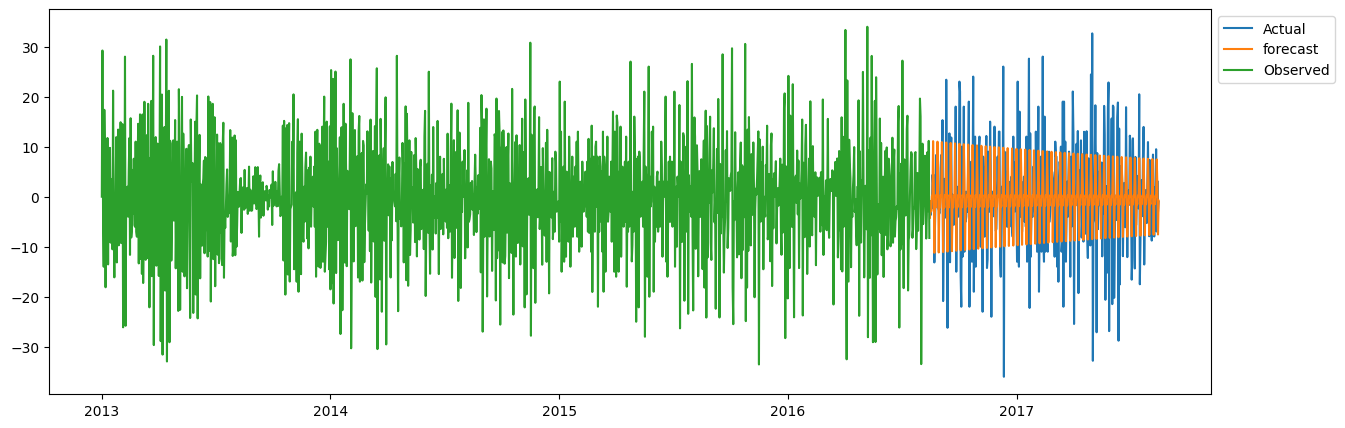

In [173]:
plt.figure(figsize = (15,5))
plt.plot(test_data['sales_diff'], label = 'Actual')
plt.plot(forecast, label = 'forecast')
plt.plot(train_data['sales_diff'], label = 'Observed')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

Machine learning Models - XGBOOST 

In [174]:
train_filled_df

,family,store_nbr,id,sales,onpromotion,Year,Month,Day,Month_name,Day_name,sales_log,sales_diff
date,,,,,,,,,,,,
2013-01-01,AUTOMOTIVE,1,0.0,0.000,0.0,1970.0,1.0,1.0,January,Tuesday,-inf,NaN
2013-01-01,AUTOMOTIVE,10,33.0,0.000,0.0,1970.0,1.0,1.0,January,Tuesday,-inf,0.000
2013-01-01,AUTOMOTIVE,11,66.0,0.000,0.0,1970.0,1.0,1.0,January,Tuesday,-inf,0.000
2013-01-01,AUTOMOTIVE,12,99.0,0.000,0.0,1970.0,1.0,1.0,January,Tuesday,-inf,0.000
2013-01-01,AUTOMOTIVE,13,132.0,0.000,0.0,1970.0,1.0,1.0,January,Tuesday,-inf,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,SEAFOOD,54,3000755.0,3.000,0.0,1970.0,8.0,15.0,August,Tuesday,1.098612,-2.000
2017-08-15,SEAFOOD,6,3000788.0,47.575,0.0,1970.0,8.0,15.0,August,Tuesday,3.862307,44.575
2017-08-15,SEAFOOD,7,3000821.0,46.507,0.0,1970.0,8.0,15.0,August,Tuesday,3.839603,-1.068


In [175]:
train_data_ = train_filled_df.iloc[:int(len(train_filled_df)*0.8)]
test_data_ = train_filled_df.iloc[int(len(train_filled_df)*0.8):]

In [176]:
# Features (X) and target variable (y)
X_train = train_data_.drop(columns=['Month_name','Day_name','sales'])  # Features (train_data)
y_train = train_data_['sales']  # Target variable (train_data)
X_test = test_data_.drop(columns=['Month_name','Day_name','sales'])  # Features (test_data)
y_test = test_data_['sales']  # Target variable (test_data)

In [177]:
numerical = train_filled_df.select_dtypes(include='number')
numerical= numerical.drop(columns=['sales_log','store_nbr','sales'])
numerical_columns = numerical.columns.tolist()


In [40]:
numerical

,id,onpromotion,Year,Month,Day,sales_diff
date,,,,,,
2013-01-01,0.0,0.0,2013.0,1.0,1.0,NaN
2013-01-01,33.0,0.0,2013.0,1.0,1.0,0.000
2013-01-01,66.0,0.0,2013.0,1.0,1.0,0.000
2013-01-01,99.0,0.0,2013.0,1.0,1.0,0.000
2013-01-01,132.0,0.0,2013.0,1.0,1.0,0.000
...,...,...,...,...,...,...
2017-08-15,3000755.0,0.0,2017.0,8.0,15.0,-2.000
2017-08-15,3000788.0,0.0,2017.0,8.0,15.0,44.575
2017-08-15,3000821.0,0.0,2017.0,8.0,15.0,-1.068


In [178]:
categorical = train_filled_df.select_dtypes(include='object')
categorical= categorical.drop(columns=['Month_name','Day_name'])

categorical_columns = categorical.columns.tolist()


In [42]:
categorical

,family
date,
2013-01-01,AUTOMOTIVE
2013-01-01,AUTOMOTIVE
2013-01-01,AUTOMOTIVE
2013-01-01,AUTOMOTIVE
2013-01-01,AUTOMOTIVE
...,...
2017-08-15,SEAFOOD
2017-08-15,SEAFOOD
2017-08-15,SEAFOOD


In [179]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
# Import mean_squared_error function
from sklearn.metrics import mean_squared_error

# Calculate mean squared error


In [180]:

# Preprocessing pipelines
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder())
])
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('categorical', categorical_pipeline, categorical_columns),
    ('numerical', numerical_pipeline, numerical_columns)
])

# Full pipeline including preprocessing and model training
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the pipeline to the training data
full_pipeline.fit(X_train, y_train)

# Make predictions on the testing data
predictions = full_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse_scores = np.sqrt(mse)
print("Mean RMSE:", rmse_scores.mean())
print("Mean Squared Error:", mse)

Mean RMSE: 788.1717231104486
Mean Squared Error: 621214.6651108937


In [188]:
models={}

#models['XGBoost'] = XGBRegressor()
#models['RandomForest'] = RandomForestRegressor()
models['GradientBoostRegressor'] = GradientBoostingRegressor()
#models['log_reg_model'] = LogisticRegression()
#models['Linear_reg'] = LinearRegression() 

In [183]:
# Creating Pipeline

all_pipelines = {}

# creating a dataframe 
metric_table=pd.DataFrame(columns=['model_name', 'MSE', 'MAE', 'RMSE', 'R_squared', 'RMSLE'])


for model_name, regressor in models.items():
    forecast_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', TransformedTargetRegressor(regressor = regressor))
    ])

    forecast_pipeline.fit(X_train, y_train)

    all_pipelines[model_name] = forecast_pipeline

    forecast = forecast_pipeline.predict(X_test)

    MSE = mean_squared_error(y_test, forecast)
    MAE = mean_absolute_error(y_test, forecast)
    RMSE =np.sqrt(mean_squared_error(y_test, forecast))
    R_squared = r2_score(y_test, forecast)

    y_test_abs = abs(y_test)
    forecast_abs = abs(forecast)

    RMSLE = np.sqrt(mean_squared_log_error(y_test_abs, forecast_abs))

    metric_table.loc[len(metric_table)]=[model_name, MSE, MAE, RMSE, R_squared, RMSLE]
# Sort values in ascending order
metric_table.sort_values(by='MSE', ascending=True)


,model_name,MSE,MAE,RMSE,R_squared,RMSLE
1,GradientBoostRegressor,406819.184620,202.462947,637.823788,0.779839,1.396275
0,XGBoost,757337.013223,249.973269,870.251121,0.590148,1.308524


In [185]:
param_grids = {
   
    
     'GradientBoostRegressor': {
         'regressor__regressor__n_estimators': [100, 200, 300],
         'regressor__regressor__learning_rate': [0.01, 0.1, 0.2],
         'regressor__regressor__max_depth': [3, 4, 5]
     }  }

In [189]:
for model_name, regressor in models.items():
    forecast_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', TransformedTargetRegressor(regressor=regressor))
    ])

    random_search = RandomizedSearchCV(
        forecast_pipeline,
        param_grids[model_name],
        cv=5,
        scoring='neg_mean_squared_error',
        n_iter=10,  # Number of parameter settings that are sampled
        random_state=42,
        n_jobs=-1
    )
    random_search.fit(X_train, y_train)

    best_pipeline = random_search.best_estimator_
    all_pipelines[model_name] = best_pipeline

    forecast = best_pipeline.predict(X_test)

    MSE = mean_squared_error(y_test, forecast)
    MAE = mean_absolute_error(y_test, forecast)
    RMSE = np.sqrt(mean_squared_error(y_test, forecast))
    R_squared = r2_score(y_test, forecast)

    y_test_abs = abs(y_test)
    forecast_abs = abs(forecast)

    RMSLE = np.sqrt(mean_squared_log_error(y_test_abs, forecast_abs))

    metric_table.loc[len(metric_table)] = [model_name, MSE, MAE, RMSE, R_squared, RMSLE]


In [52]:
metric_table.sort_values(by='MSE', ascending=True)

,model_name,MSE,MAE,RMSE,R_squared,RMSLE
0,XGBoost,492805.399606,211.761641,702.000997,0.733306,1.41051


In [ ]:

   
   
    # Actual vs. Predicted Values Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, forecast, alpha=0.3)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs. Predicted Values for {model_name}')
    plt.show()

    # Residuals Plot
    residuals = y_test - forecast

    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title(f'Residuals Distribution for {model_name}')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(forecast, residuals, alpha=0.3)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs. Predicted Values for {model_name}')
    plt.show()


In [ ]:
for model_name, pipeline in all_pipelines.items():
    joblib.dump(model_name, f'./Trained models/ {model_name}.joblib')